In [ ]:
# By Abdeslem ISSAADI, Univ. Paris 8

# From Self-Attention mechanism to Transformers

This notebook aims to provide a comprehensive and practical understanding of the self-attention mechanism and its applications in various contexts, through detailed explanations, visualizations and interactive exercises.

## Self-Attention mechanism: basic implementation

Here is an example of Python code using TensorFlow and Matplotlib to explain and visualize the Self-Attention mechanism. This code shows intermediate steps such as generating queries, keys, and values ​​matrices, as well as calculating attention scores and applying attention weights to values. .

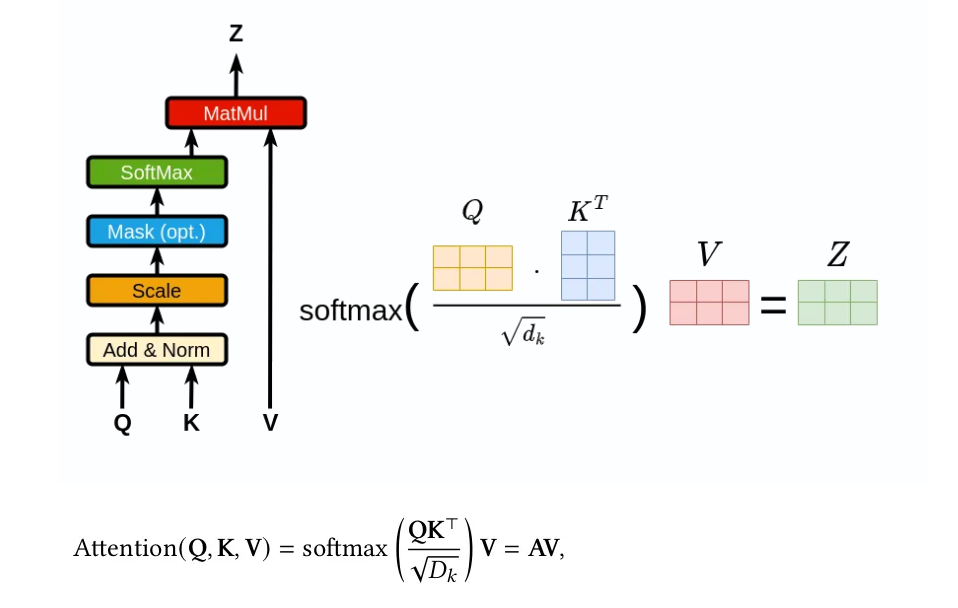

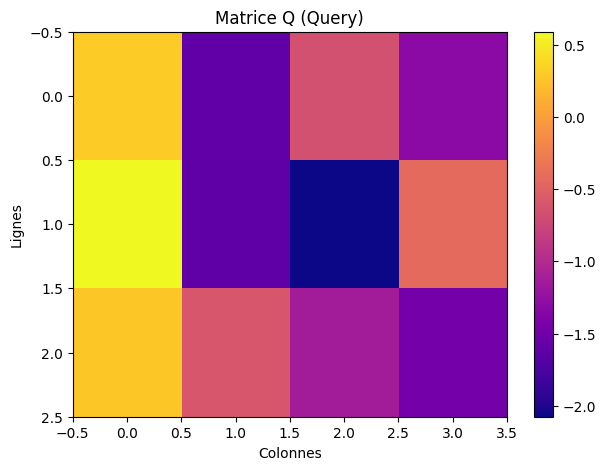

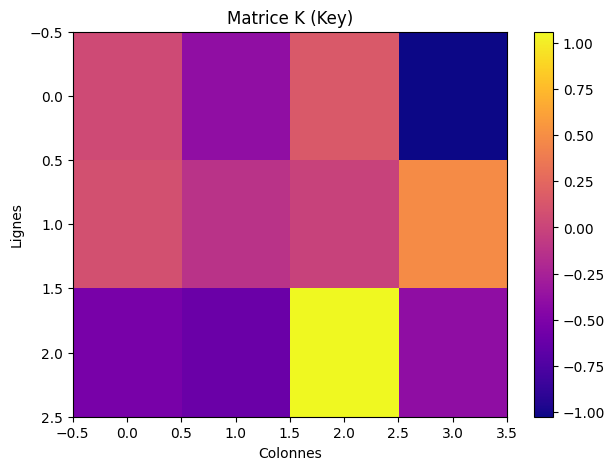

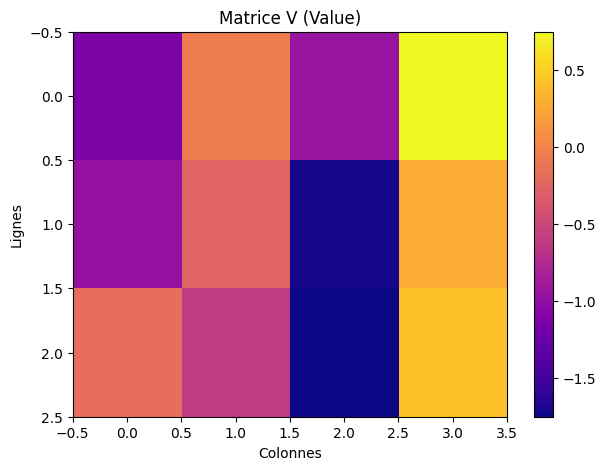

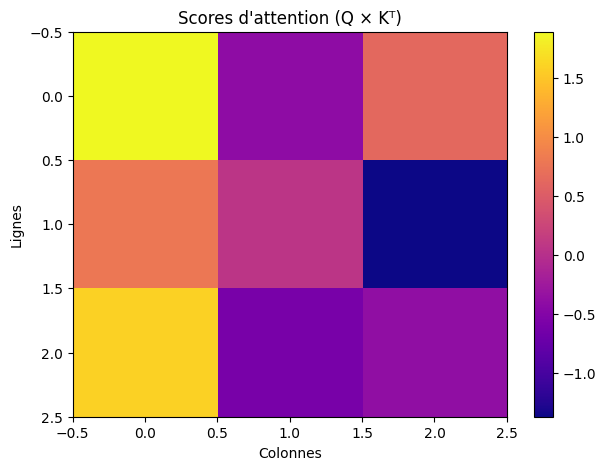

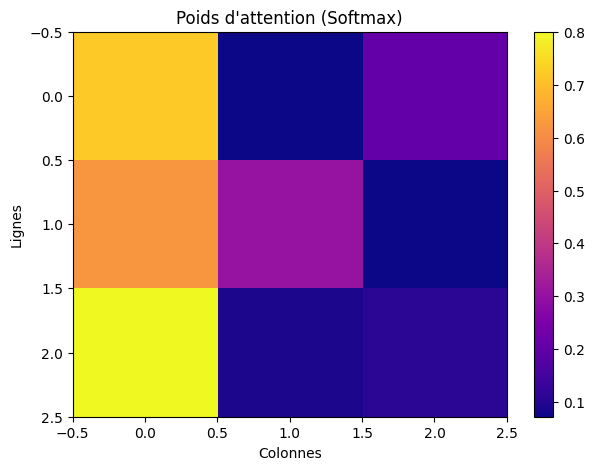

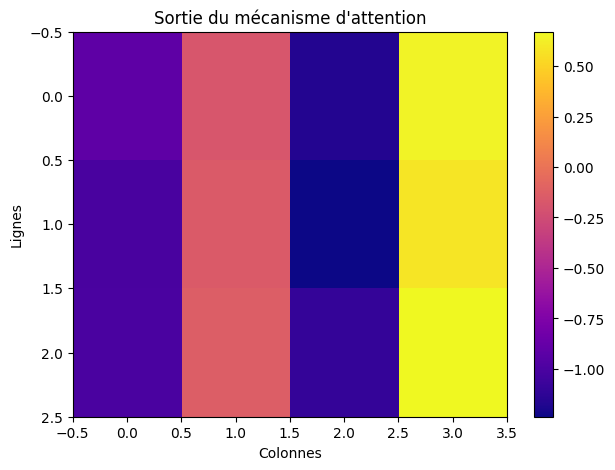

Séquence d'entrée :
 [[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 1.]]

Matrice Q :
 [[ 0.30418664 -1.6034501  -0.6535354  -1.3076844 ]
 [ 0.5906954  -1.6080079  -2.0759754  -0.42523843]
 [ 0.28273124 -0.60496926 -1.1324482  -1.473715  ]]

Matrice K :
 [[ 0.04430079 -0.39644217  0.15069729 -1.0237076 ]
 [ 0.08469504 -0.12286735 -0.01304221  0.48775506]
 [-0.53314286 -0.60194993  1.0583254  -0.40482077]]

Matrice V :
 [[-1.1203297  -0.05394328 -0.9433366   0.7488844 ]
 [-0.9792439  -0.24928457 -1.7175443   0.2850715 ]
 [-0.16245651 -0.604168   -1.7520503   0.41212964]]

Scores d'attention :
 [[ 1.8893515  -0.4065314   0.64074636]
 [ 0.7861264   0.06726374 -1.3718969 ]
 [ 1.5903568  -0.6057654  -0.38848323]]

Poids d'attention :
 [[0.72068065 0.0725527  0.20676668]
 [0.62388504 0.30402303 0.07209197]
 [0.8003437  0.08902516 0.11063109]]

Sortie finale :
 [[-0.9120374  -0.18188396 -1.1667225   0.64560384]
 [-1.0083815  -0.15299831 -1.2370154   0.5835973 ]
 [-1.0017989  -0.13220552 -1.1017294 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fonction utilitaire pour visualiser une matrice
def afficher_matrice(mat, titre):
    plt.figure(figsize=(7, 5))
    plt.imshow(mat, cmap="plasma", aspect="auto")
    plt.colorbar()
    plt.title(titre)
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.show()

# Exemple de séquence d'entrée : chaque ligne = vecteur de caractéristiques
entree = np.array([[1, 0, 1, 0],
                   [0, 2, 1, 0],
                   [1, 1, 0, 1]], dtype=float)

# Paramètres du modèle
dimension = entree.shape[1]  # Taille d'embedding
nb_tetes = 1  # Une seule tête d'attention (simple)

# Création des matrices Q, K, V via des couches linéaires
dense_q = tf.keras.layers.Dense(dimension)
dense_k = tf.keras.layers.Dense(dimension)
dense_v = tf.keras.layers.Dense(dimension)

Q = dense_q(entree)
K = dense_k(entree)
V = dense_v(entree)

# Affichage des matrices
afficher_matrice(Q, "Matrice Q (Query)")
afficher_matrice(K, "Matrice K (Key)")
afficher_matrice(V, "Matrice V (Value)")

# Calcul des scores d'attention : Q × K^T
scores = tf.matmul(Q, K, transpose_b=True)
afficher_matrice(scores, "Scores d'attention (Q × Kᵀ)")

# Application du softmax pour obtenir les poids d'attention
poids_attention = tf.nn.softmax(scores, axis=-1)
afficher_matrice(poids_attention, "Poids d'attention (Softmax)")

# Calcul de la sortie de l'attention
sortie_attention = tf.matmul(poids_attention, V)
afficher_matrice(sortie_attention, "Sortie du mécanisme d'attention")

# Affichage dans la console
print("Séquence d'entrée :\n", entree)
print("\nMatrice Q :\n", Q.numpy())
print("\nMatrice K :\n", K.numpy())
print("\nMatrice V :\n", V.numpy())
print("\nScores d'attention :\n", scores.numpy())
print("\nPoids d'attention :\n", poids_attention.numpy())
print("\nSortie finale :\n", sortie_attention.numpy())


### Detailed Explanations of Each Step
#### Input Sequence: The input sequence is a matrix where each row represents a feature vector for an element of the sequence. This is the data we want to apply self-attention to.

#### Query, Key, and Value Matrices: These matrices are created by applying linear transformations (Dense layers) to the input sequence.
- Queries: Used to compare against keys to measure similarity.
- Keys: Used in conjunction with queries to compute attention scores.
- Values: Contain the information we want to focus on and extract based on the computed attention scores.

#### Attention Scores:

- Calculated by taking the dot product of the query matrix and the transposed key matrix.
- This gives a measure of similarity between elements of the sequence.

#### Attention Weights:

- The scores are passed through a softmax function to convert them into probabilities (attention weights).
- These weights determine the relative importance of each element in the sequence.

#### Attention Output:

- The attention weights are applied to the value matrix to compute the final attention output.
- This output represents the weighted sum of values based on their attention weights, capturing the relevant information from the input sequence.

### Visualizations
- Query, Key, and Value Matrices: Visualized to understand how the input sequence is transformed.
- Attention Scores: Show the similarity measures between different elements of the sequence.
- Attention Weights: Show the normalized importance of each element in the sequence.
- Attention Output: The final weighted output that captures the important information based on the attention mechanism.

## Self-Attention mechanism: Using a sentence as input

The sentence "I love tennis" is represented using embeddings, and the self-attention mechanism is applied to transform these embeddings.

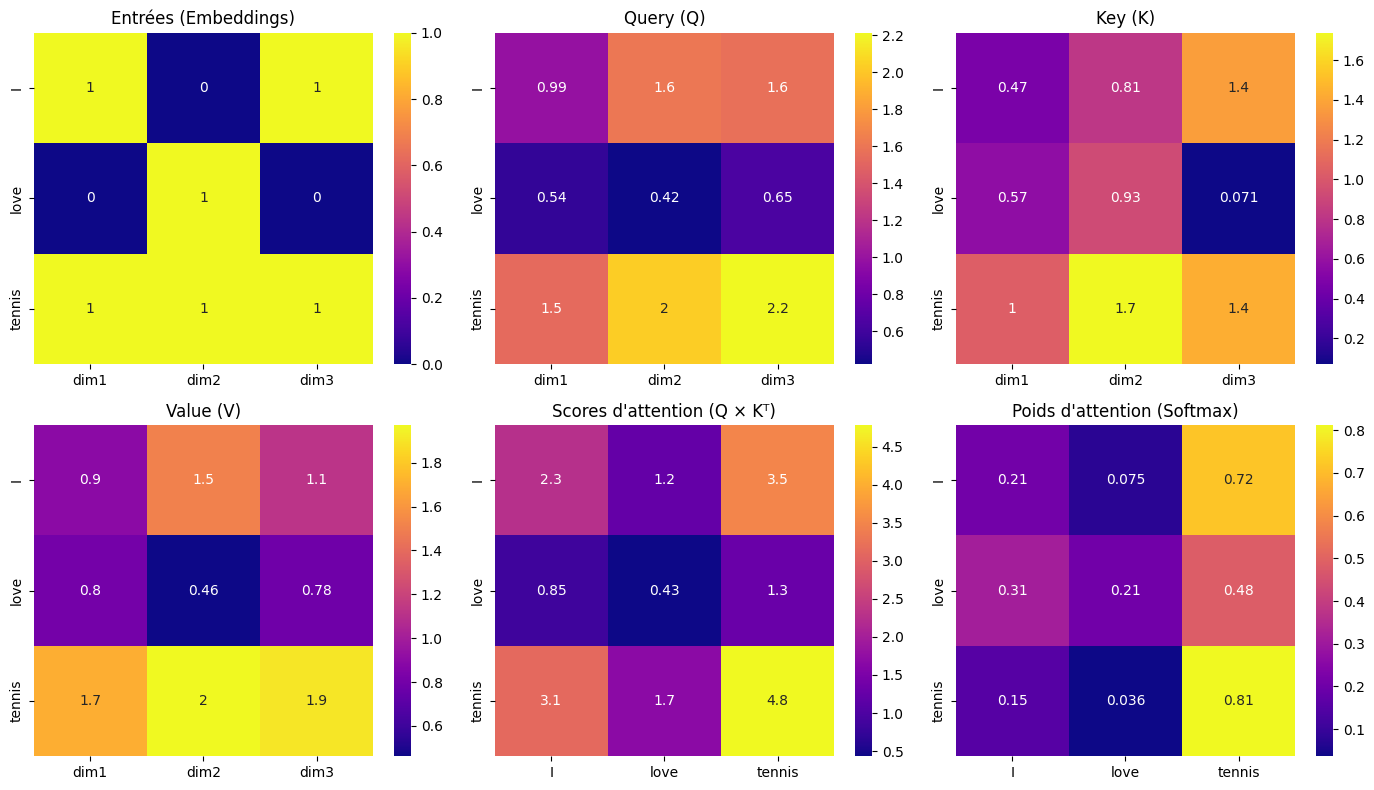

Phrase : ['I', 'love', 'tennis']

Entrées :
 [[1 0 1]
 [0 1 0]
 [1 1 1]]

Matrice Q :
 [[0.98640072 1.60696237 1.56642614]
 [0.54488318 0.4236548  0.64589411]
 [1.5312839  2.03061717 2.21232025]]

Matrice K :
 [[0.47057082 0.81194344 1.36151477]
 [0.56804456 0.92559664 0.07103606]
 [1.03861538 1.73754007 1.43255082]]

Matrice V :
 [[0.89643118 1.50993317 1.12197163]
 [0.79915856 0.46147936 0.78052918]
 [1.69558974 1.97141253 1.90250081]]

Scores d'attention :
 [[2.25261651 1.24649419 3.4991107 ]
 [0.85435382 0.43158847 1.28594229]
 [3.10697034 1.67808266 4.78505299]]

Poids d'attention :
 [[0.2064511  0.07548555 0.71806334]
 [0.31299554 0.20508481 0.48191965]
 [0.15163339 0.03632761 0.812039  ]]

Sortie finale :
 [[1.46293497 1.76216147 1.65666705]
 [1.26161226 1.5173072  1.42809932]
 [1.54184542 1.84658459 1.74338797]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction softmax personnalisée
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # stabilisation numérique
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Petits embeddings de mots (3 dimensions chacun)
vecteurs = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "tennis": [1, 1, 1]
}

# Séquence d'entrée
phrase = ["I", "love", "tennis"]
entree = np.array([vecteurs[mot] for mot in phrase])

# Initialisation aléatoire des matrices Wq, Wk, Wv
np.random.seed(0)
W_q = np.random.rand(3, 3)
W_k = np.random.rand(3, 3)
W_v = np.random.rand(3, 3)

# Calcul des matrices Query, Key et Value
Q = np.dot(entree, W_q)
K = np.dot(entree, W_k)
V = np.dot(entree, W_v)

# Scores d'attention normalisés
scores = np.dot(Q, K.T) / np.sqrt(K.shape[-1])

# Poids d'attention via softmax
poids = softmax(scores)

# Sortie finale de l'attention
sortie = np.dot(poids, V)

# Visualisation
plt.figure(figsize=(14, 8))

# Entrées
plt.subplot(2, 3, 1)
sns.heatmap(entree, annot=True, cmap="plasma", xticklabels=["dim1", "dim2", "dim3"], yticklabels=phrase)
plt.title("Entrées (Embeddings)")

# Matrice Q
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap="plasma", xticklabels=["dim1", "dim2", "dim3"], yticklabels=phrase)
plt.title("Query (Q)")

# Matrice K
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap="plasma", xticklabels=["dim1", "dim2", "dim3"], yticklabels=phrase)
plt.title("Key (K)")

# Matrice V
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap="plasma", xticklabels=["dim1", "dim2", "dim3"], yticklabels=phrase)
plt.title("Value (V)")

# Scores d'attention
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap="plasma", xticklabels=phrase, yticklabels=phrase)
plt.title("Scores d'attention (Q × Kᵀ)")

# Poids après softmax
plt.subplot(2, 3, 6)
sns.heatmap(poids, annot=True, cmap="plasma", xticklabels=phrase, yticklabels=phrase)
plt.title("Poids d'attention (Softmax)")

plt.tight_layout()
plt.show()

# Impression des résultats
print("Phrase :", phrase)
print("\nEntrées :\n", entree)
print("\nMatrice Q :\n", Q)
print("\nMatrice K :\n", K)
print("\nMatrice V :\n", V)
print("\nScores d'attention :\n", scores)
print("\nPoids d'attention :\n", poids)
print("\nSortie finale :\n", sortie)


![image.png](attachment:image.png)

## Self-Attention mechanism: Word embeddings computing

To demonstrate a basic self-attention mechanism with real embeddings, we'll use a simple approach to compute word embeddings based on co-occurrence statistics from the given sentence. Here, I'll provide a complete example including the calculation of basic word embeddings and applying the self-attention mechanism.

### Step-by-Step Process
 - Tokenize the Sentence: We'll split the sentence into individual words (tokens).

 - Calculate Word Embeddings: We'll use a basic technique to create embeddings based on the context of each word. In this case, we'll use one-hot encoding as the simplest form of embedding.

 - Apply Self-Attention: Using the calculated embeddings, we'll apply the self-attention mechanism and visualize the intermediate results.

 - Initialize Weights: Random weights for Query (Q), Key (K), and Value (V) matrices are initialized.

 - Compute Q, K, and V Matrices: The input embeddings are transformed into Q, K, and V matrices using the initialized weights.

 - Compute Attention Scores: Attention scores are calculated by taking the dot product of Q and K transpose, then normalizing by the square root of the key dimension.

 - Apply Softmax to Get Attention Weights: The softmax function is applied to the attention scores to obtain the attention weights.

- Compute the Output: The final output is calculated by multiplying the attention weights with the value matrix V.

 - Visualization: Various stages of the self-attention mechanism (inputs, Q, K, V matrices, attention scores, and attention weights) are visualized using heatmaps.

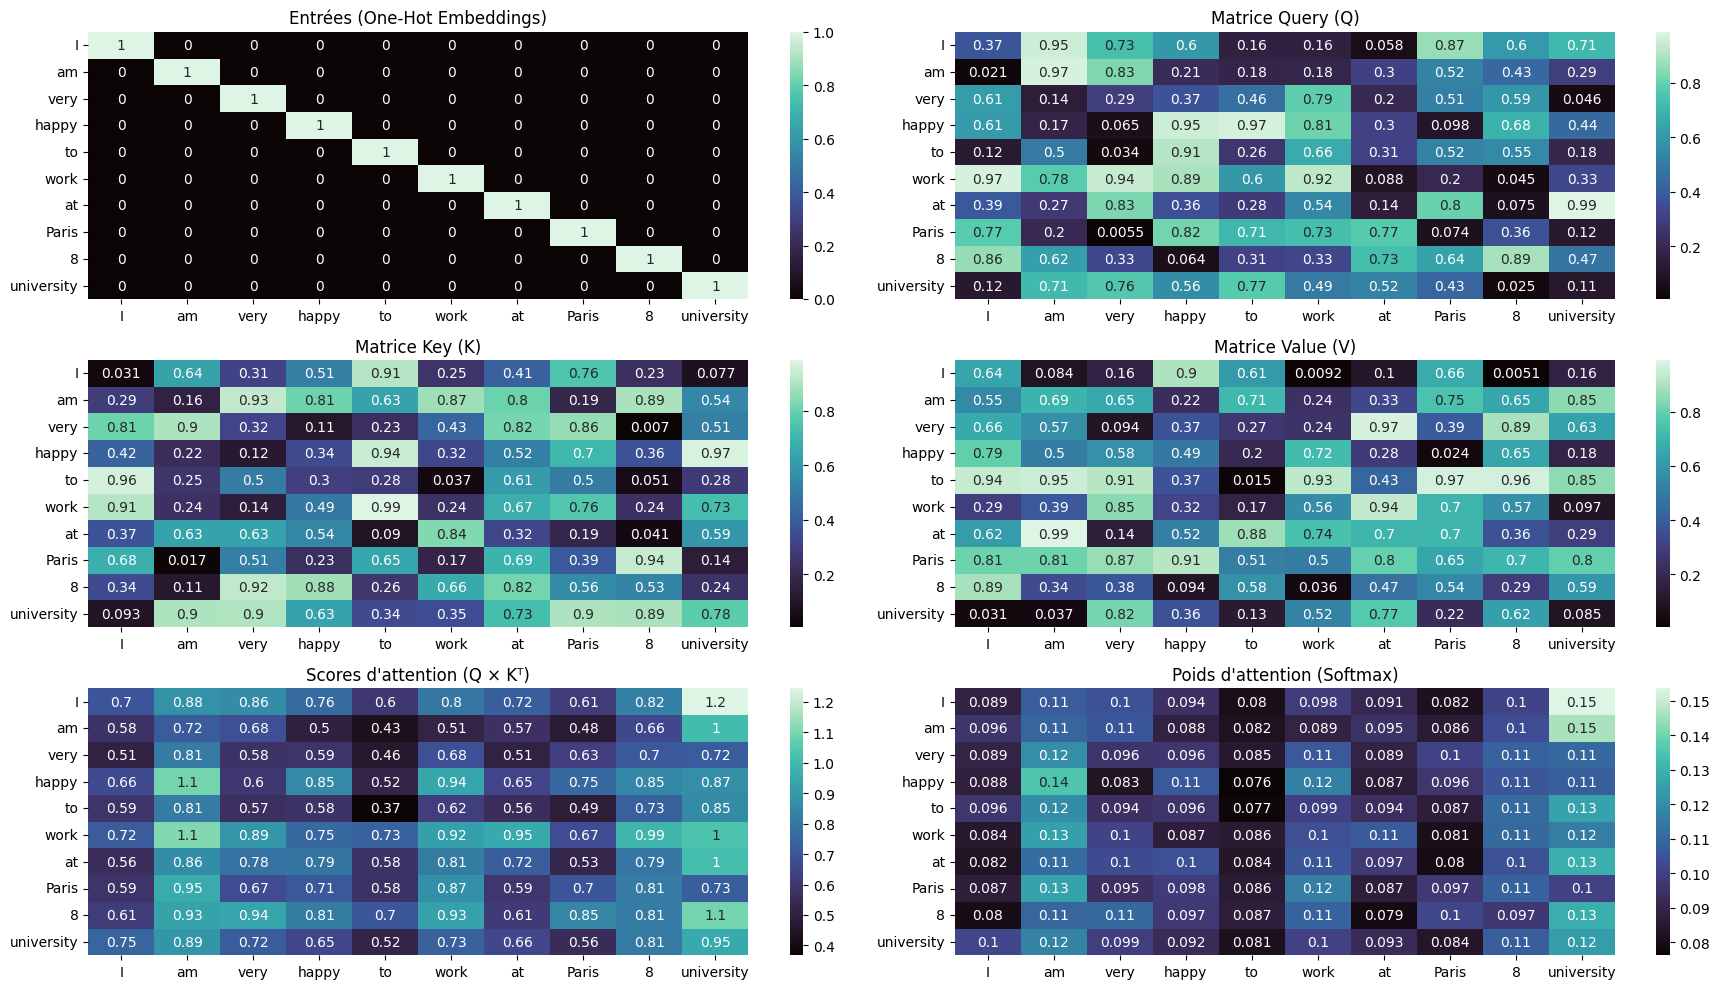

Phrase : ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Entrées :
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q) :
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.546

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction softmax avec stabilisation numérique
def stable_softmax(x):
    x_shifted = x - np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Phrase d'exemple
phrase = "I am very happy to work at Paris 8 university".split()
n_tokens = len(phrase)

# Création d'embeddings one-hot (chaque mot est un vecteur unique)
indices = {mot: i for i, mot in enumerate(phrase)}
embedding_matrix = np.eye(n_tokens)

# Conversion de la phrase en séquence de vecteurs
X = np.array([embedding_matrix[indices[mot]] for mot in phrase])

# Initialisation aléatoire des matrices de projection
np.random.seed(42)
W_Q = np.random.rand(n_tokens, n_tokens)
W_K = np.random.rand(n_tokens, n_tokens)
W_V = np.random.rand(n_tokens, n_tokens)

# Calcul des matrices Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# Calcul des scores d'attention (produit scalaire entre Q et K)
scores = (Q @ K.T) / np.sqrt(Q.shape[-1])

# Application du softmax pour obtenir les poids d'attention
attn_weights = stable_softmax(scores)

# Calcul de la sortie pondérée
output = attn_weights @ V

# Visualisation avec seaborn
plt.figure(figsize=(18, 10))

mots = phrase
cm = "mako"  # colormap différente pour varier le rendu

# Entrées (one-hot)
plt.subplot(3, 2, 1)
sns.heatmap(X, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Entrées (One-Hot Embeddings)")

# Query
plt.subplot(3, 2, 2)
sns.heatmap(Q, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Matrice Query (Q)")

# Key
plt.subplot(3, 2, 3)
sns.heatmap(K, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Matrice Key (K)")

# Value
plt.subplot(3, 2, 4)
sns.heatmap(V, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Matrice Value (V)")

# Scores d'attention
plt.subplot(3, 2, 5)
sns.heatmap(scores, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Scores d'attention (Q × Kᵀ)")

# Poids d'attention
plt.subplot(3, 2, 6)
sns.heatmap(attn_weights, annot=True, cmap=cm, xticklabels=mots, yticklabels=mots)
plt.title("Poids d'attention (Softmax)")

plt.tight_layout()
plt.show()

# Affichage des résultats
print("Phrase :", phrase)
print("\nEntrées :\n", X)
print("\nQuery (Q) :\n", Q)
print("\nKey (K) :\n", K)
print("\nValue (V) :\n", V)
print("\nScores d'attention :\n", scores)
print("\nPoids d'attention :\n", attn_weights)
print("\nSortie finale :\n", output)


![image.png](attachment:image.png)

## Complete Encoder Implementation

The encoder implementation involves several key steps, each contributing to transforming the input data and capturing relationships and context within a sentence. Here’s a detailed explanation of each step:


1. Tokenization and Embedding

 - Tokenization: The input sentence "I am very happy to work at Paris 8 university" is split into individual words (tokens), creating a list of tokens.

 - Embedding: Each word in the sentence is represented using one-hot encoding, which is a basic form of word embedding. In one-hot encoding, each word is represented by a unique vector where only one element is 1 (indicating the presence of the word), and all other elements are 0.

2. Initialize Weights

 - Weight Initialization: Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices, as well as for the feed-forward neural network layers. These weights will be used to transform the input embeddings during the self-attention and feed-forward processes.

3. Self-Attention Layer

 - Compute Q, K, and V Matrices: The input embeddings are multiplied by the respective weight matrices to obtain the Q, K, and V matrices. These matrices are essential for calculating attention scores.

 - Calculate Attention Scores: The attention scores are calculated by taking the dot product of the Q matrix and the transpose of the K matrix. The resulting scores are then scaled by the square root of the dimension of the key vectors to ensure stable gradients.

 - Softmax Application: The softmax function is applied to the attention scores to convert them into probabilities, which represent the attention weights. These weights indicate how much attention each word should pay to other words in the sentence.

 - Compute Attention Output: The attention weights are multiplied by the V matrix to obtain the attention output. This output is a weighted sum of the value vectors, capturing the context and relationships between words.

4. Add & Norm Layer (Self-Attention)

 - Residual Connection and Layer Normalization: The attention output is added to the original input embeddings (residual connection) to preserve the initial information. Layer normalization is then applied to the result, ensuring stable and normalized outputs.

5. Feed-Forward Layer

 - Feed-Forward Neural Network: The output from the self-attention layer is passed through a feed-forward neural network, which typically consists of two linear transformations with a ReLU activation function in between. This layer further transforms the data, capturing more complex relationships.

6. Add & Norm Layer (Feed-Forward)

 - Residual Connection and Layer Normalization: The output from the feed-forward layer is added to the self-attention output (residual connection) and normalized again using layer normalization. This step helps in maintaining the stability and richness of the transformed data.


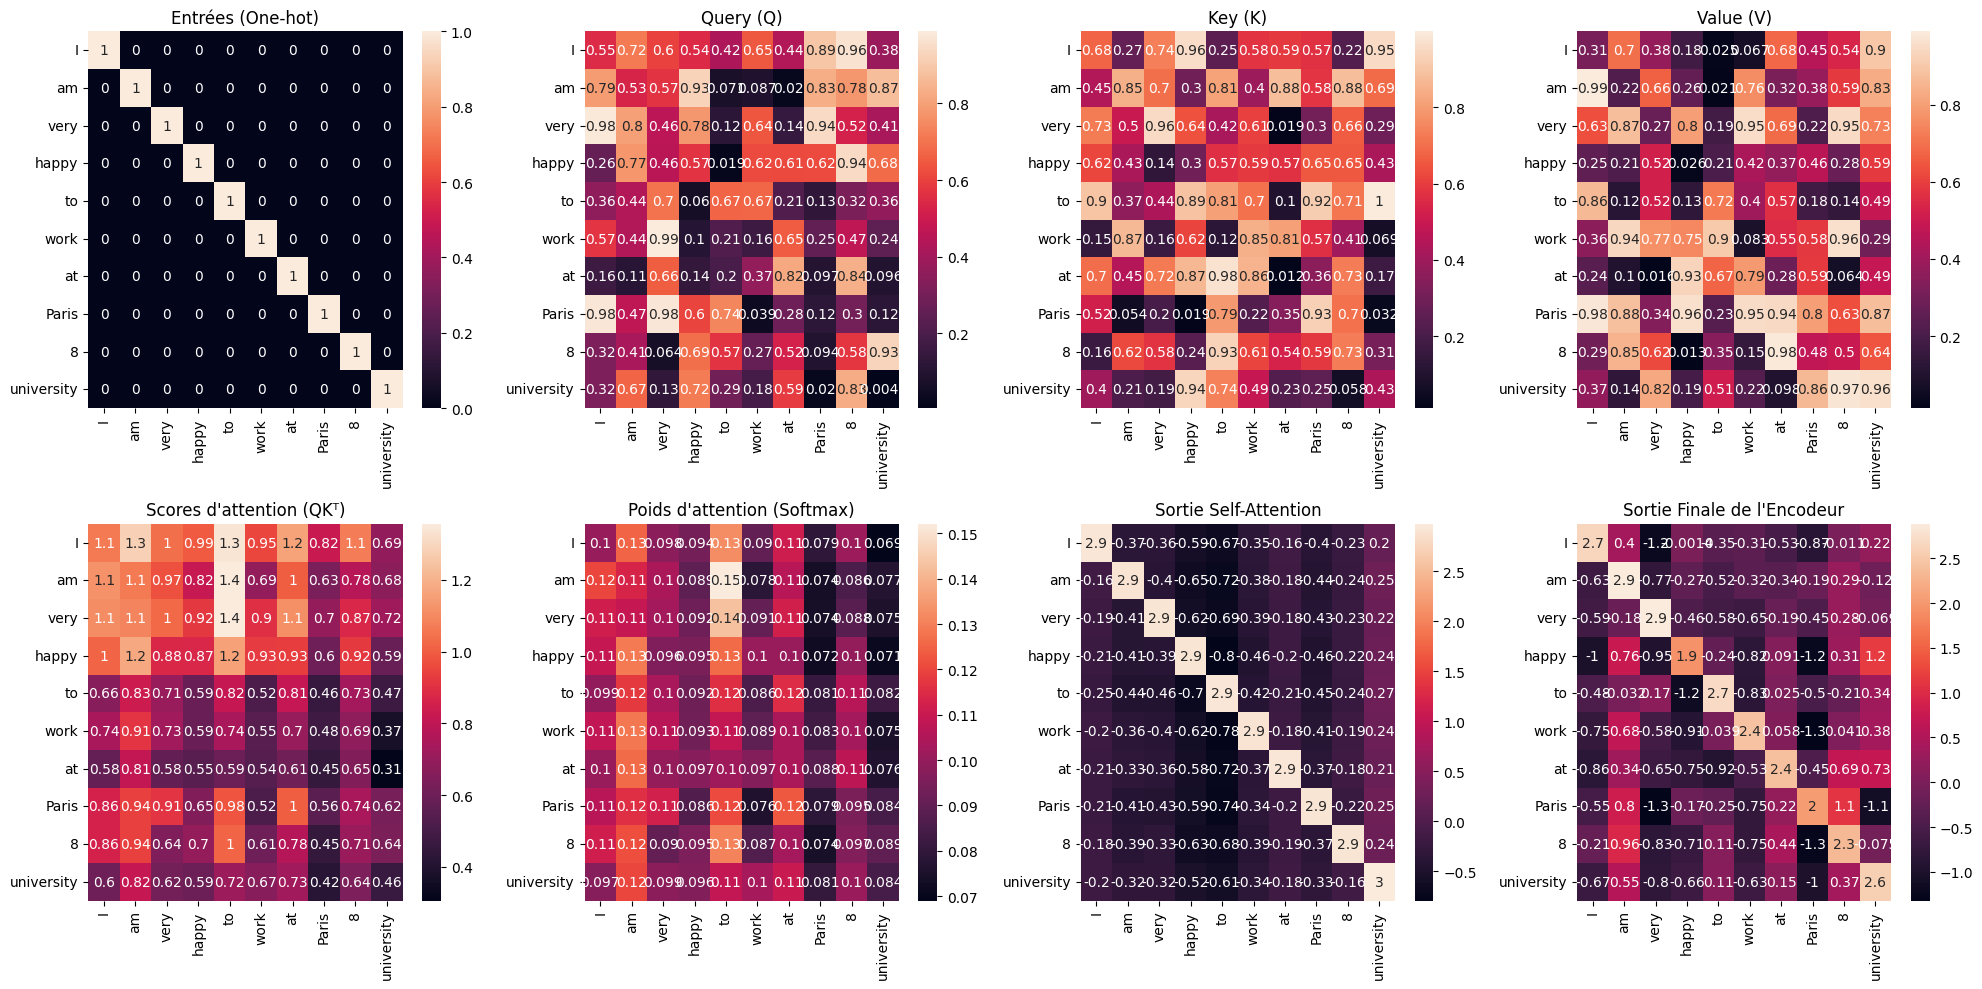

Phrase : ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Entrées :
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q) :
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.31542

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def stable_softmax(x):
    """Softmax numériquement stable"""
    x_shift = x - np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x_shift)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def normalization(x):
    """Normalisation de couche (LayerNorm simplifiée)"""
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + 1e-8)

# --- Préparation des données ---
texte = "I am very happy to work at Paris 8 university".split()
n = len(texte)

# Embeddings one-hot
index_map = {mot: i for i, mot in enumerate(texte)}
embedding_matrix = np.eye(n)
X = np.array([embedding_matrix[index_map[mot]] for mot in texte])

# --- Poids aléatoires ---
np.random.seed(0)
W_Q = np.random.rand(n, n)
W_K = np.random.rand(n, n)
W_V = np.random.rand(n, n)
W_ff1 = np.random.rand(n, n)
W_ff2 = np.random.rand(n, n)

# --- Self-Attention ---
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

scores = (Q @ K.T) / np.sqrt(K.shape[-1])
attn_weights = stable_softmax(scores)
attn_output = attn_weights @ V

# Add & Norm
attn_output = normalization(attn_output + X)

# --- Feed-Forward ---
ff = np.maximum(0, attn_output @ W_ff1)
ff = ff @ W_ff2

# Add & Norm
encoder_out = normalization(ff + attn_output)

# --- Visualisation ---
plt.figure(figsize=(20, 10))
cmap_choice = "rocket"  # autre palette pour varier un peu

# Inputs
plt.subplot(2, 4, 1)
sns.heatmap(X, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Entrées (One-hot)")

# Query
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Query (Q)")

# Key
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Key (K)")

# Value
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Value (V)")

# Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Scores d'attention (QKᵀ)")

# Poids Softmax
plt.subplot(2, 4, 6)
sns.heatmap(attn_weights, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Poids d'attention (Softmax)")

# Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attn_output, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Sortie Self-Attention")

# Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_out, annot=True, cmap=cmap_choice, xticklabels=texte, yticklabels=texte)
plt.title("Sortie Finale de l'Encodeur")

plt.tight_layout()
plt.show()

# --- Affichage console ---
print("Phrase :", texte)
print("\nEntrées :\n", X)
print("\nQuery (Q) :\n", Q)
print("\nKey (K) :\n", K)
print("\nValue (V) :\n", V)
print("\nScores d'attention :\n", scores)
print("\nPoids d'attention :\n", attn_weights)
print("\nSortie Self-Attention :\n", attn_output)
print("\nSortie Feed-Forward :\n", ff)
print("\nSortie Encoder Finale :\n", encoder_out)


![image.png](attachment:image.png)

## Complete Encoder-Decoder Implementation Using Self-Attention

To implement a complete encoder-decoder model using self-attention, we'll extend the previous encoder implementation by adding a decoder component. The decoder will also include self-attention and cross-attention layers to process the encoder outputs and generate predictions.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder. Additionally, weights are initialized for the feed-forward layers in both the encoder and decoder.

3. Encoder

 - Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

4. Decoder

 - Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. This step allows the decoder to attend to the encoder's outputs. Attention scores are computed and normalized using softmax to obtain cross-attention weights.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

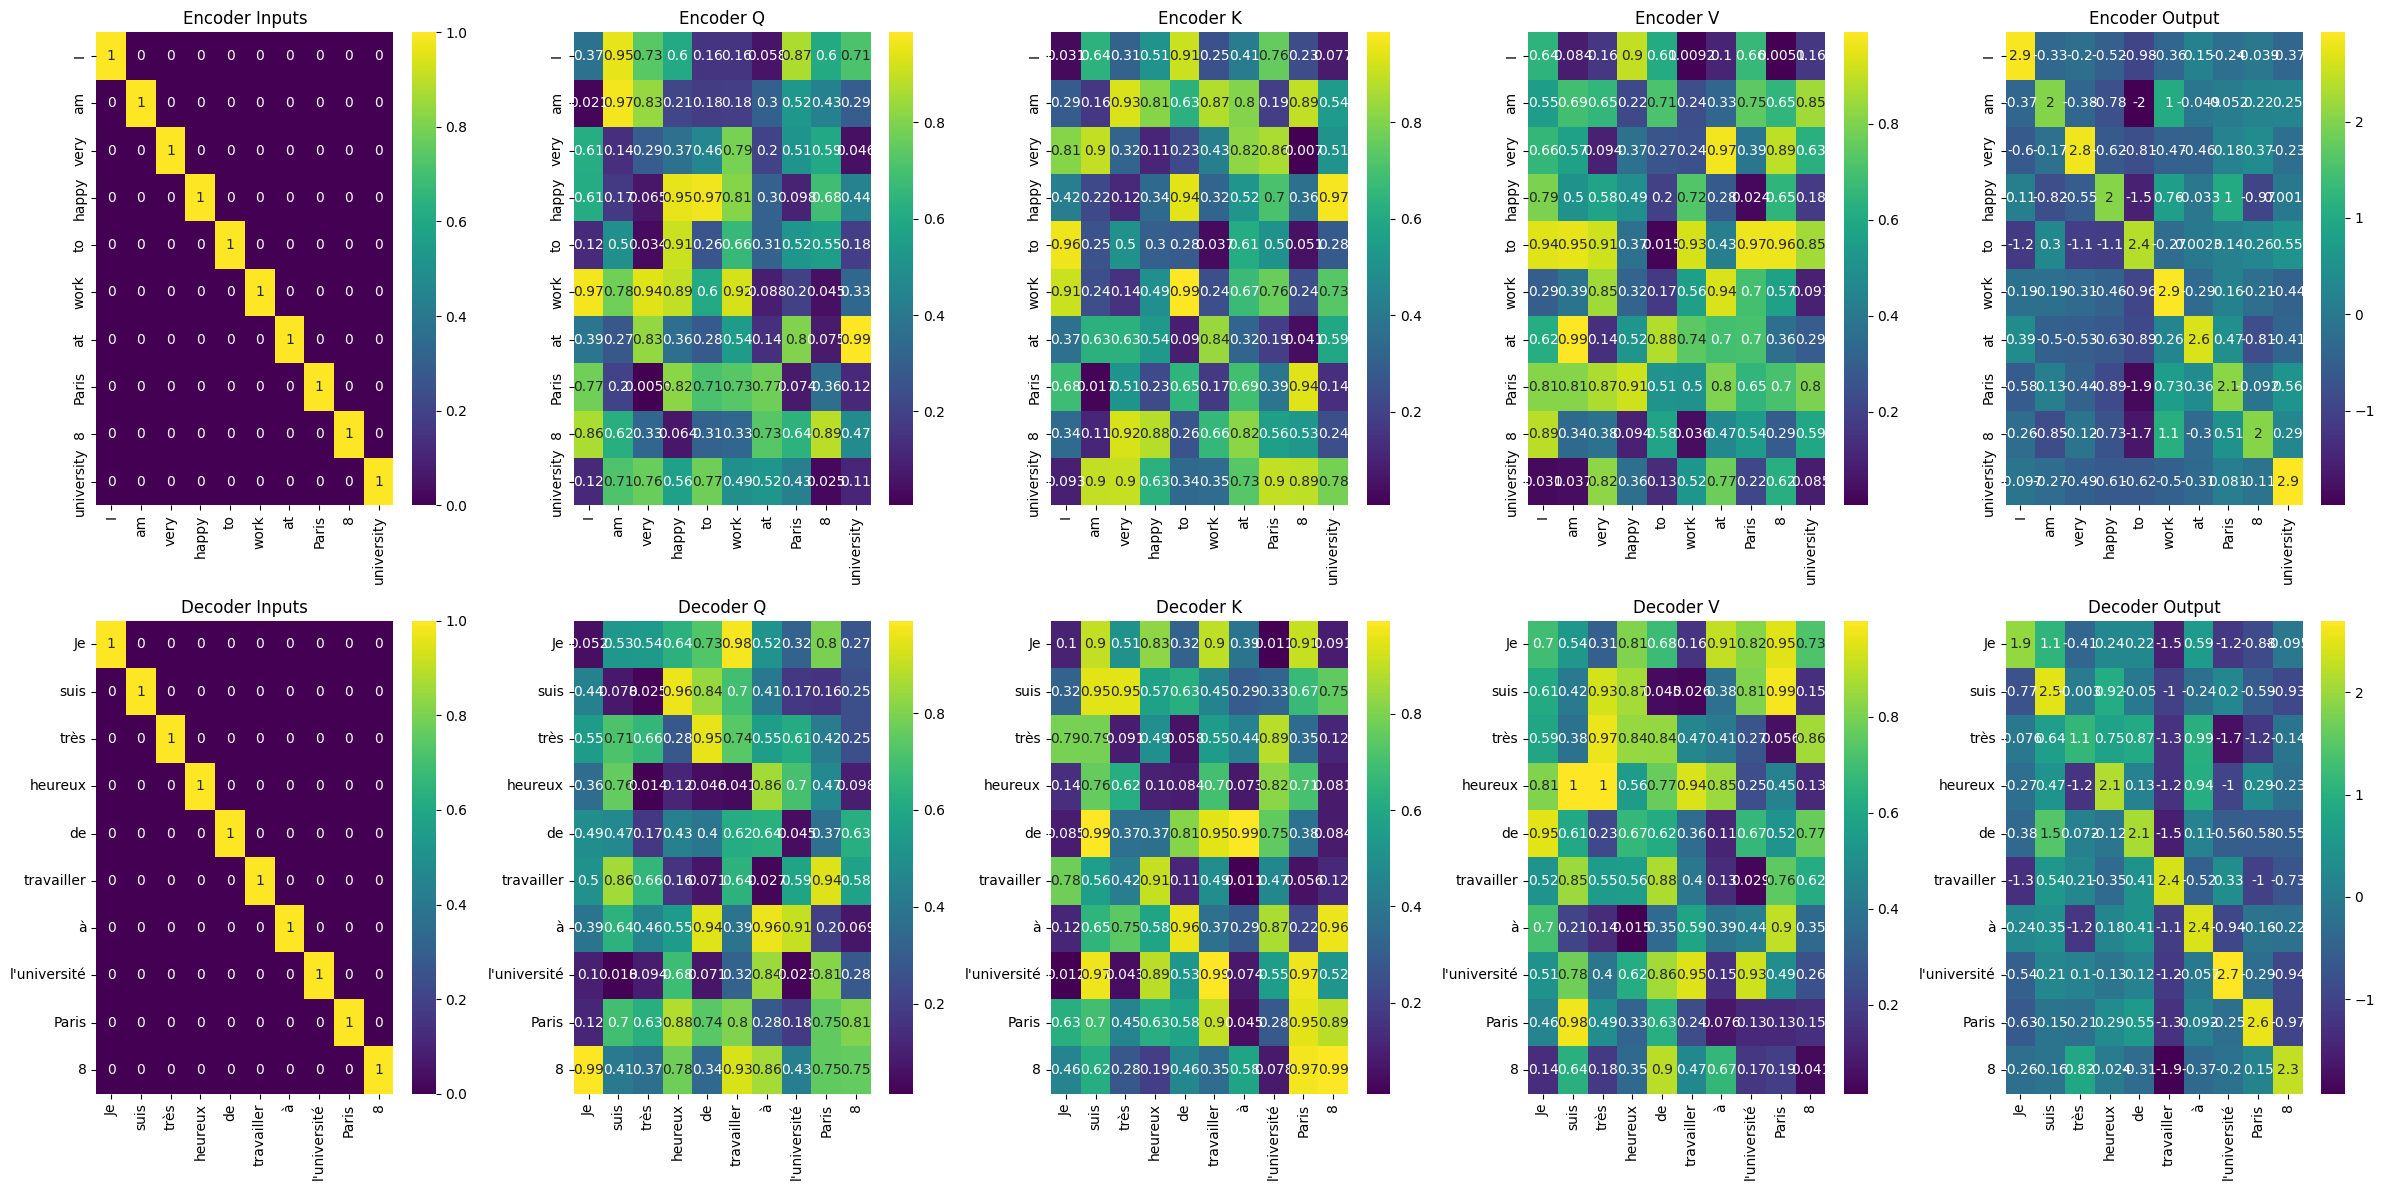

Encoder Tokens: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Query (Q):
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.92187424
  0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
  0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734 0.72900717
  0.77127035 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def stable_softmax(x):
    """Version stable du softmax"""
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def normalize(x):
    """Normalisation de couche"""
    eps = 1e-9
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

# --- Préparation des données ---
enc_text = "I am very happy to work at Paris 8 university".split()
dec_text = "Je suis très heureux de travailler à l'université Paris 8".split()

enc_vocab = len(enc_text)
dec_vocab = len(dec_text)

# Dictionnaires et embeddings one-hot
enc_index = {word: i for i, word in enumerate(enc_text)}
dec_index = {word: i for i, word in enumerate(dec_text)}

enc_embed = np.eye(enc_vocab)
dec_embed = np.eye(dec_vocab)

enc_inputs = np.array([enc_embed[enc_index[w]] for w in enc_text])
dec_inputs = np.array([dec_embed[dec_index[w]] for w in dec_text])

# --- Poids du modèle ---
np.random.seed(42)
Wq_e, Wk_e, Wv_e = [np.random.rand(enc_vocab, enc_vocab) for _ in range(3)]
Wq_d, Wk_d, Wv_d = [np.random.rand(dec_vocab, dec_vocab) for _ in range(3)]

Wff1_e, Wff2_e = [np.random.rand(enc_vocab, enc_vocab) for _ in range(2)]
Wff1_d, Wff2_d = [np.random.rand(dec_vocab, dec_vocab) for _ in range(2)]

# --- ENCODER ---
Qe = enc_inputs @ Wq_e
Ke = enc_inputs @ Wk_e
Ve = enc_inputs @ Wv_e

score_e = (Qe @ Ke.T) / np.sqrt(Ke.shape[-1])
attn_w_e = stable_softmax(score_e)
attn_out_e = attn_w_e @ Ve

# Residual & normalization
attn_out_e = normalize(attn_out_e + enc_inputs)

# Feed Forward
ffn_e = np.maximum(0, attn_out_e @ Wff1_e) @ Wff2_e
enc_output = normalize(ffn_e + attn_out_e)

# --- DECODER ---
Qd = dec_inputs @ Wq_d
Kd = dec_inputs @ Wk_d
Vd = dec_inputs @ Wv_d

score_d = (Qd @ Kd.T) / np.sqrt(Kd.shape[-1])
attn_w_d = stable_softmax(score_d)
attn_out_d = attn_w_d @ Vd
attn_out_d = normalize(attn_out_d + dec_inputs)

# Cross-Attention
Qx = attn_out_d @ Wq_d
Kx = enc_output @ Wk_e
Vx = enc_output @ Wv_e

score_x = (Qx @ Kx.T) / np.sqrt(Kx.shape[-1])
attn_w_x = stable_softmax(score_x)
cross_out = attn_w_x @ Vx
cross_out = normalize(cross_out + attn_out_d)

# Feed Forward (Decoder)
ffn_d = np.maximum(0, cross_out @ Wff1_d) @ Wff2_d
dec_output = normalize(ffn_d + cross_out)

# --- VISUALISATION ---
plt.figure(figsize=(24, 12))

titles = [
    ('Encoder Inputs', enc_inputs, enc_text),
    ('Encoder Q', Qe, enc_text),
    ('Encoder K', Ke, enc_text),
    ('Encoder V', Ve, enc_text),
    ('Encoder Output', enc_output, enc_text),
    ('Decoder Inputs', dec_inputs, dec_text),
    ('Decoder Q', Qd, dec_text),
    ('Decoder K', Kd, dec_text),
    ('Decoder V', Vd, dec_text),
    ('Decoder Output', dec_output, dec_text)
]

for i, (title, mat, labels) in enumerate(titles, 1):
    plt.subplot(2, 5, i)
    sns.heatmap(mat, annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.title(title)

plt.tight_layout()
plt.show()

# --- Impression des résultats ---
print("Encoder Tokens:", enc_text)
print("\nEncoder Query (Q):\n", Qe)
print("\nEncoder Key (K):\n", Ke)
print("\nEncoder Value (V):\n", Ve)
print("\nEncoder Output:\n", enc_output)

print("\nDecoder Tokens:", dec_text)
print("\nDecoder Query (Q):\n", Qd)
print("\nDecoder Key (K):\n", Kd)
print("\nDecoder Value (V):\n", Vd)
print("\nDecoder Output:\n", dec_output)


## Complete Encoder-Decoder Implementation Using Multi-Head Self-Attention : A transformer !

This encoder-decoder implementation with multi-head self-attention includes both self-attention and cross-attention mechanisms, residual connections, and layer normalization, demonstrating how the input sentence is transformed and how the decoder attends to the encoder's output to generate the final result. The multi-head attention mechanism allows the model to focus on different parts of the input sentence simultaneously, capturing more complex relationships and context.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder, as well as for the feed-forward neural network layers. These weights are necessary for transforming the input embeddings during self-attention and feed-forward processes.

3. Multi-Head Self-Attention

 - Function Definition: The multi_head_attention function splits Q, K, and V matrices into multiple heads, performs self-attention on each head independently, and concatenates the outputs.

4. Encoder

 - Multi-Head Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

5. Decoder

 - Multi-Head Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. The multi_head_attention function is used to compute the cross-attention output across multiple heads, allowing the decoder to attend to the encoder's outputs.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

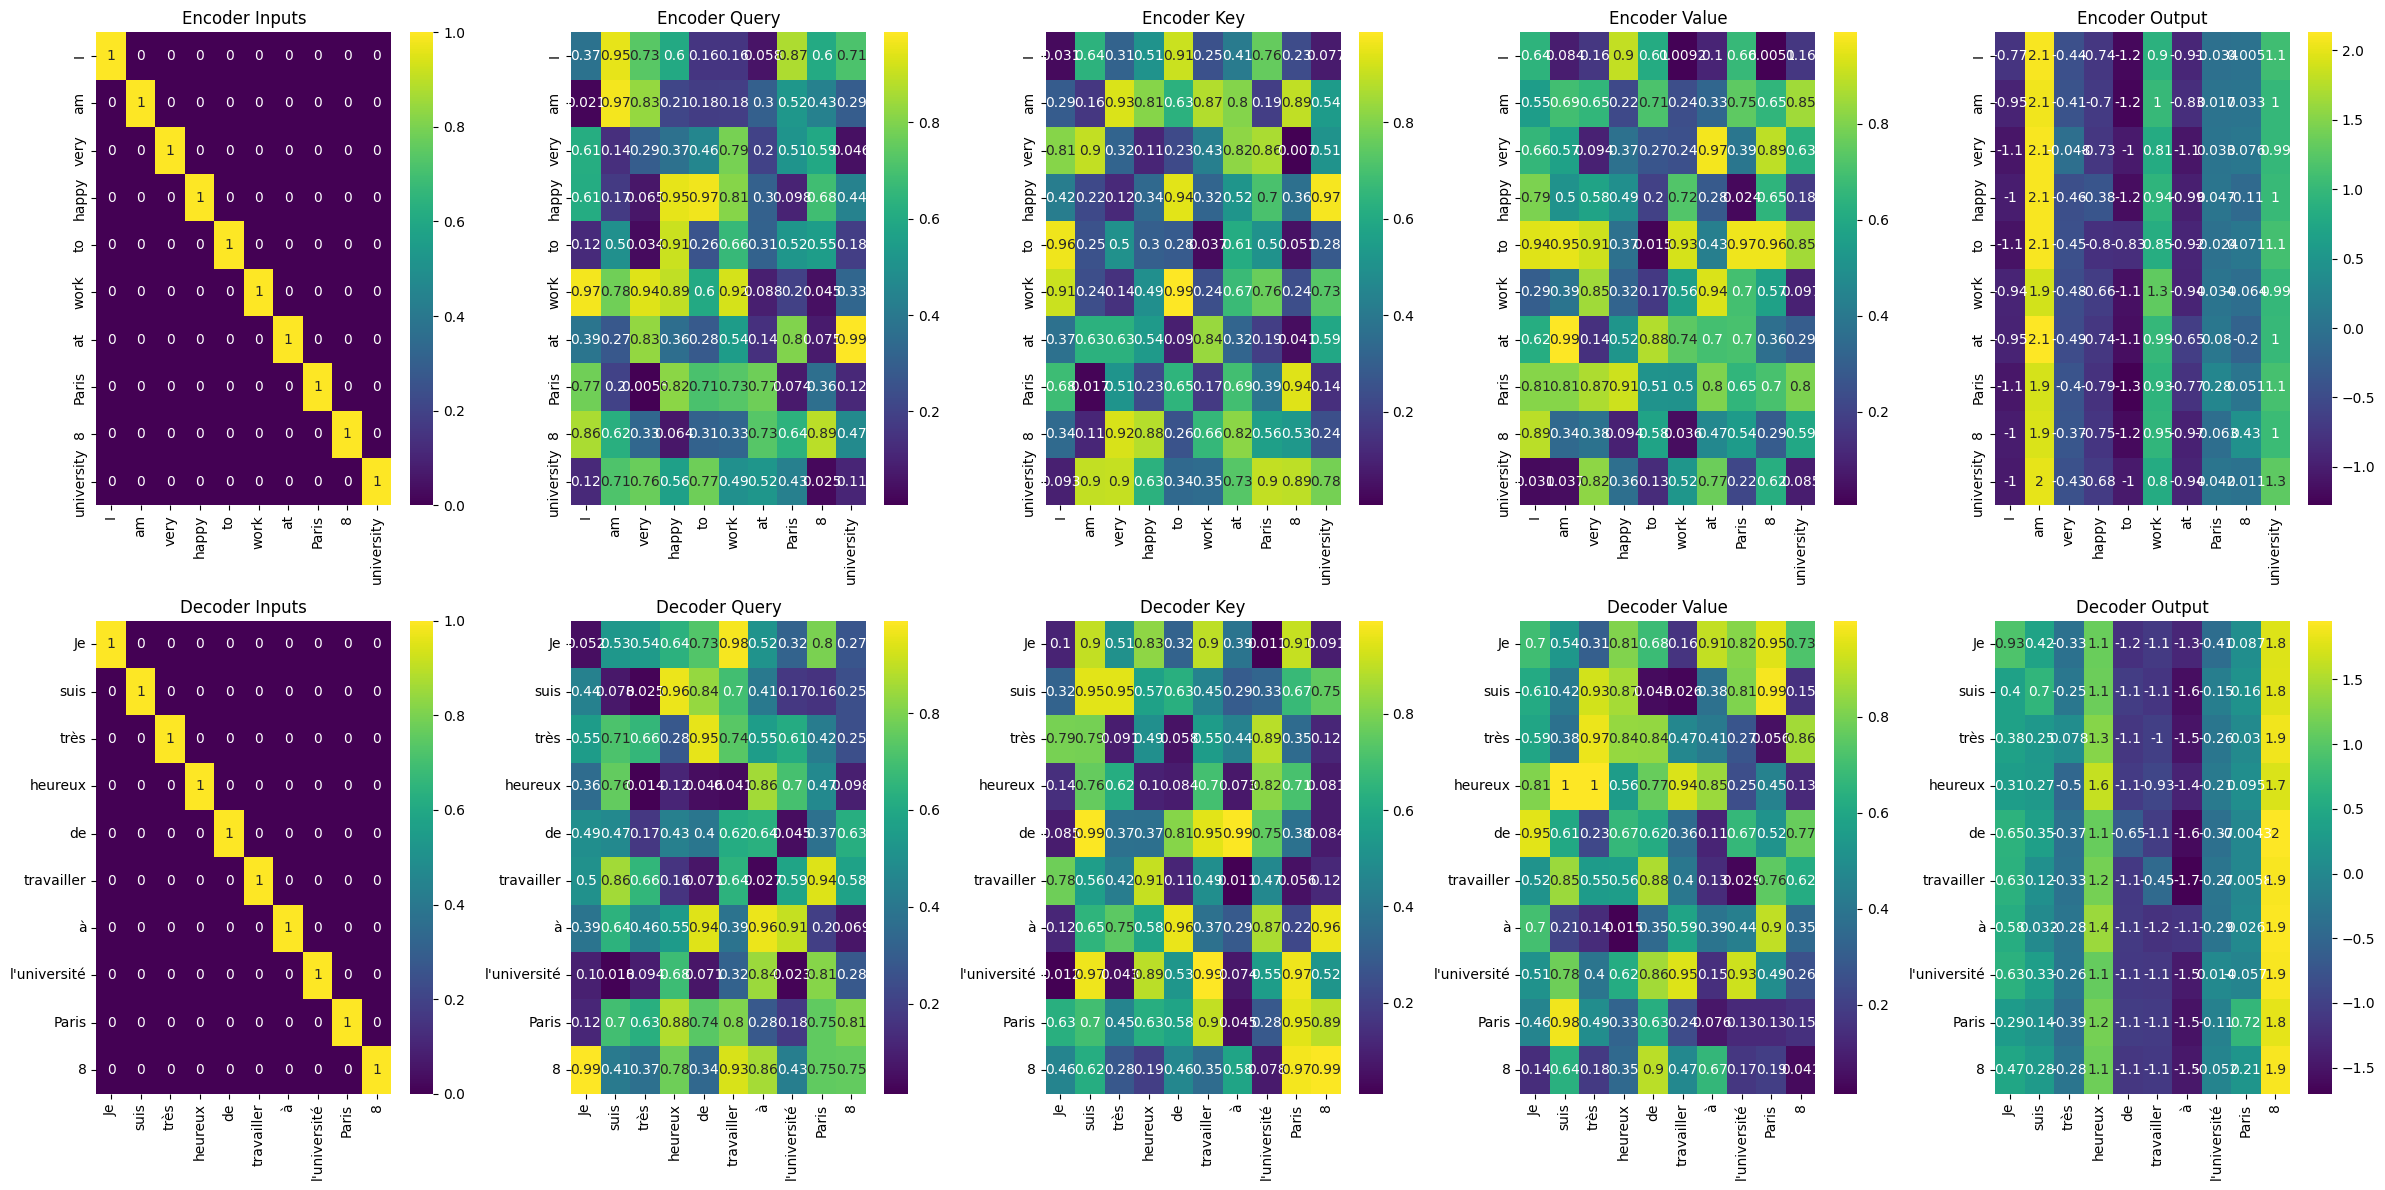

Encoder Tokens: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Output:
 [[-0.76595915  2.0998903  -0.43968101 -0.73722222 -1.20640616  0.89736463
  -0.90672747 -0.03387385  0.00498213  1.08763279]
 [-0.94840735  2.05827159 -0.40801131 -0.6953171  -1.23057757  1.00627324
  -0.8307077   0.01716451  0.03346112  0.99785057]
 [-1.08865386  2.089516   -0.04804866 -0.73331332 -1.0405057   0.8092782
  -1.08740325  0.03271737  0.07550567  0.99090754]
 [-1.00147037  2.09653371 -0.45563416 -0.3780517  -1.15987745  0.93545629
  -0.99009582  0.04732771 -0.11185356  1.01766535]
 [-1.11340489  2.10145372 -0.44878905 -0.79874498 -0.82812609  0.84863129
  -0.92285956 -0.02387321  0.07148723  1.11422553]
 [-0.94152277  1.89804413 -0.48023901 -0.66431276 -1.13443734  1.29718738
  -0.93711489  0.0338887  -0.06441681  0.99292338]
 [-0.95366714  2.12830928 -0.49440379 -0.74009711 -1.14859645  0.98608176
  -0.65384642  0.07991997 -0.20436954  1.00066943]
 [-1.06487215  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def stable_softmax(x):
    """Softmax numériquement stable"""
    z = x - np.max(x, axis=-1, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=-1, keepdims=True)

def layer_normalization(x, eps=1e-8):
    """Normalisation par couche"""
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

def multi_head_attention(Q, K, V, num_heads):
    """Implémentation simplifiée du multi-head attention"""
    d_model = Q.shape[-1]
    d_k = d_model // num_heads

    heads = []
    for h in range(num_heads):
        Wq = np.random.rand(d_model, d_k)
        Wk = np.random.rand(d_model, d_k)
        Wv = np.random.rand(d_model, d_k)

        Qh = Q @ Wq
        Kh = K @ Wk
        Vh = V @ Wv

        scores = (Qh @ Kh.T) / np.sqrt(d_k)
        weights = stable_softmax(scores)
        head_output = weights @ Vh
        heads.append(head_output)

    concat_output = np.concatenate(heads, axis=-1)
    Wo = np.random.rand(concat_output.shape[-1], d_model)
    return concat_output @ Wo

# --- Données ---
encoder_tokens = "I am very happy to work at Paris 8 university".split()
decoder_tokens = "Je suis très heureux de travailler à l'université Paris 8".split()

enc_vocab = len(encoder_tokens)
dec_vocab = len(decoder_tokens)

# Embeddings one-hot
enc_map = {w: i for i, w in enumerate(encoder_tokens)}
dec_map = {w: i for i, w in enumerate(decoder_tokens)}

enc_embed = np.eye(enc_vocab)
dec_embed = np.eye(dec_vocab)

enc_inputs = np.array([enc_embed[enc_map[w]] for w in encoder_tokens])
dec_inputs = np.array([dec_embed[dec_map[w]] for w in decoder_tokens])

# --- Initialisation des poids ---
np.random.seed(42)
num_heads = 4

Wq_e, Wk_e, Wv_e = [np.random.rand(enc_vocab, enc_vocab) for _ in range(3)]
Wq_d, Wk_d, Wv_d = [np.random.rand(dec_vocab, dec_vocab) for _ in range(3)]
Wff1_e, Wff2_e = [np.random.rand(enc_vocab, enc_vocab) for _ in range(2)]
Wff1_d, Wff2_d = [np.random.rand(dec_vocab, dec_vocab) for _ in range(2)]

# --- ENCODER ---
Qe, Ke, Ve = enc_inputs @ Wq_e, enc_inputs @ Wk_e, enc_inputs @ Wv_e
enc_attention = multi_head_attention(Qe, Ke, Ve, num_heads)
enc_attention = layer_normalization(enc_attention + enc_inputs)

ffn_enc = np.maximum(0, enc_attention @ Wff1_e) @ Wff2_e
enc_output = layer_normalization(ffn_enc + enc_attention)

# --- DECODER ---
Qd, Kd, Vd = dec_inputs @ Wq_d, dec_inputs @ Wk_d, dec_inputs @ Wv_d
dec_attention = multi_head_attention(Qd, Kd, Vd, num_heads)
dec_attention = layer_normalization(dec_attention + dec_inputs)

# Cross-Attention
Qx = dec_attention @ Wq_d
Kx = enc_output @ Wk_e
Vx = enc_output @ Wv_e

cross_attention = multi_head_attention(Qx, Kx, Vx, num_heads)
cross_attention = layer_normalization(cross_attention + dec_attention)

ffn_dec = np.maximum(0, cross_attention @ Wff1_d) @ Wff2_d
dec_output = layer_normalization(ffn_dec + cross_attention)

# --- VISUALISATION ---
plt.figure(figsize=(24, 12))

titles = [
    ("Encoder Inputs", enc_inputs, encoder_tokens),
    ("Encoder Query", Qe, encoder_tokens),
    ("Encoder Key", Ke, encoder_tokens),
    ("Encoder Value", Ve, encoder_tokens),
    ("Encoder Output", enc_output, encoder_tokens),
    ("Decoder Inputs", dec_inputs, decoder_tokens),
    ("Decoder Query", Qd, decoder_tokens),
    ("Decoder Key", Kd, decoder_tokens),
    ("Decoder Value", Vd, decoder_tokens),
    ("Decoder Output", dec_output, decoder_tokens)
]

for i, (title, mat, labels) in enumerate(titles, 1):
    plt.subplot(2, 5, i)
    sns.heatmap(mat, annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.title(title)

plt.tight_layout()
plt.show()

# --- Affichage console ---
print("Encoder Tokens:", encoder_tokens)
print("\nEncoder Output:\n", enc_output)
print("\nDecoder Tokens:", decoder_tokens)
print("\nDecoder Output:\n", dec_output)


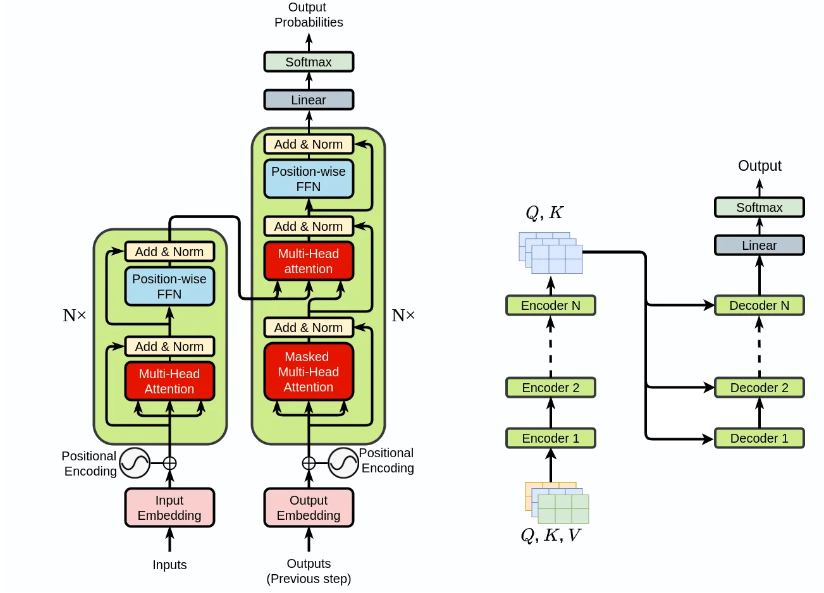



```
# This is formatted as code
```

## Exercices

### Exercice 1 : Self-Attention mechanism: basic implementation

- Modify the `input_sequence` to include an additional dimension and write a function to handle this new input shape. Compute and visualize the query, key, and value matrices for this modified sequence.
- Change the number of attention heads to 2 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head attention.
- Experiment with different scaling factors for the attention scores. Instead of dividing by the square root of the key dimension, try different constants and observe the effects on the attention weights and output. Visualize and discuss the impact.

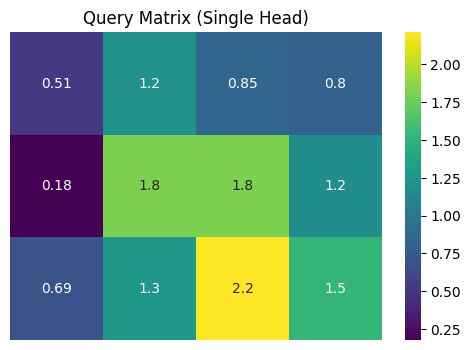

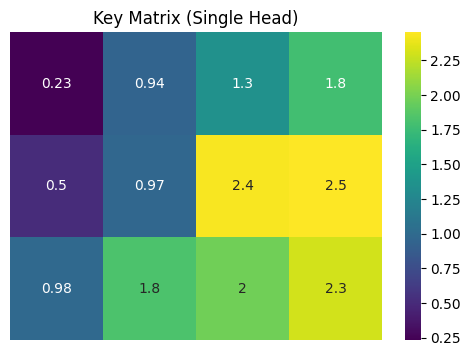

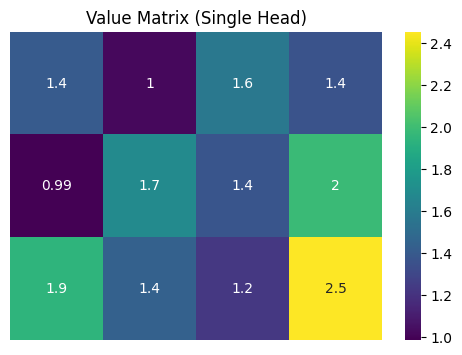

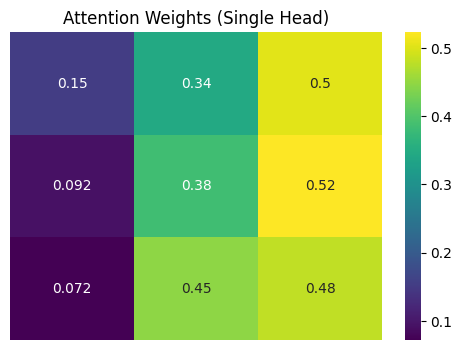

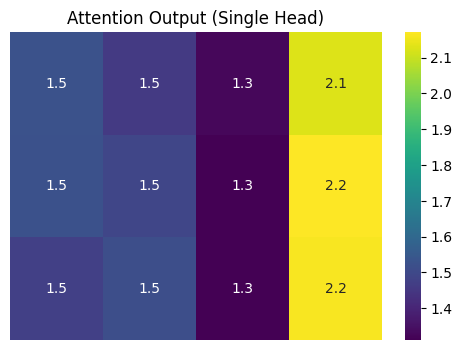

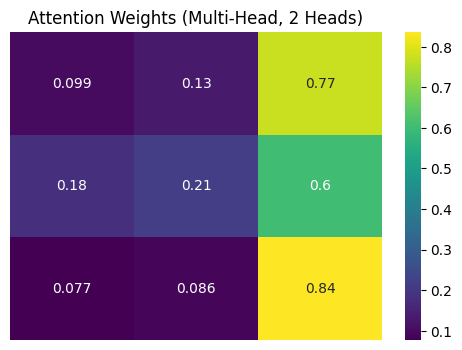

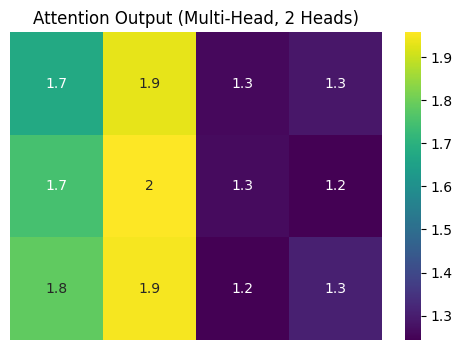

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    z = x - np.max(x, axis=-1, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=-1, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)  # Supprime les dimensions de taille 1
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels is not None else False,
                yticklabels=yticklabels if yticklabels is not None else False)
    plt.title(title)
    plt.show()

# --- Input avec batch_size ---
input_sequence = np.array([
    [[1, 0, 1, 0],
     [0, 2, 1, 0],
     [1, 1, 0, 1]]
])  # shape = (1, 3, 4)

def self_attention(inputs, num_heads=1, scaling_factor=None):
    batch_size, seq_len, d_model = inputs.shape
    d_k = d_model // num_heads

    Wq = np.random.rand(d_model, d_model)
    Wk = np.random.rand(d_model, d_model)
    Wv = np.random.rand(d_model, d_model)

    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    Q_heads = np.split(Q, num_heads, axis=-1)
    K_heads = np.split(K, num_heads, axis=-1)
    V_heads = np.split(V, num_heads, axis=-1)

    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].transpose(0, 2, 1))
        if scaling_factor is None:
            scaling_factor = np.sqrt(d_k)
        scores = scores / scaling_factor

        weights = softmax(scores)
        output = np.dot(weights, V_heads[i])
        attention_outputs.append(output)

    multi_head_output = np.concatenate(attention_outputs, axis=-1)
    return Q, K, V, weights, multi_head_output

# --- Single-head attention ---
Q_single, K_single, V_single, weights_single, output_single = self_attention(input_sequence, num_heads=1)

# Affichage corrigé
plot_heatmap(Q_single[0], "Query Matrix (Single Head)")
plot_heatmap(K_single[0], "Key Matrix (Single Head)")
plot_heatmap(V_single[0], "Value Matrix (Single Head)")
plot_heatmap(weights_single[0], "Attention Weights (Single Head)")
plot_heatmap(output_single[0], "Attention Output (Single Head)")

# --- Multi-head attention (2 heads) ---
Q_multi, K_multi, V_multi, weights_multi, output_multi = self_attention(input_sequence, num_heads=2)
plot_heatmap(weights_multi[0], "Attention Weights (Multi-Head, 2 Heads)")
plot_heatmap(output_multi[0], "Attention Output (Multi-Head, 2 Heads)")


### Exercice 2: Self-Attention mechanism: Using a sentence as input

- Change the sentence from "I love tennis" to a longer sentence of your choice. Convert this new sentence into a sequence of embeddings and compute the query, key, and value matrices. Visualize and explain the results.
- Implement a masking mechanism to handle padding tokens in the sentence. Compute the attention scores and apply the mask before softmax. Visualize the attention weights with and without masking and discuss the differences.
- Experiment with different embedding initialization methods. Use random initialization and pre-trained embeddings (e.g., from GloVe or FastText). Compute and visualize the attention scores and outputs for both cases. Compare the results.

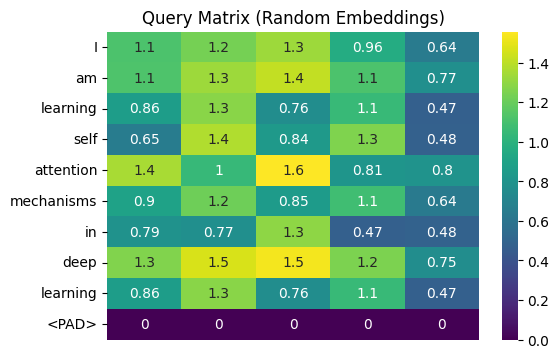

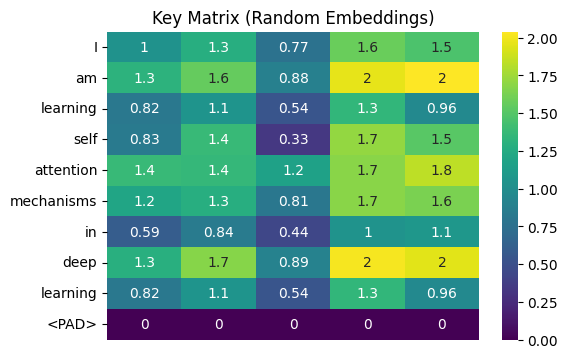

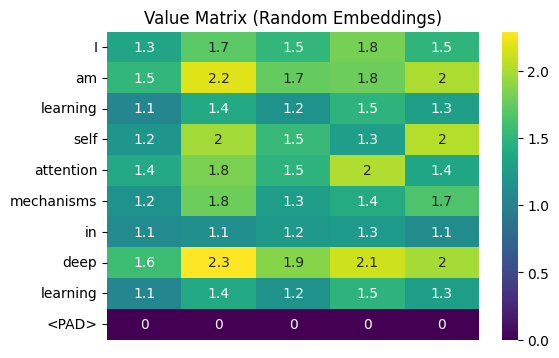

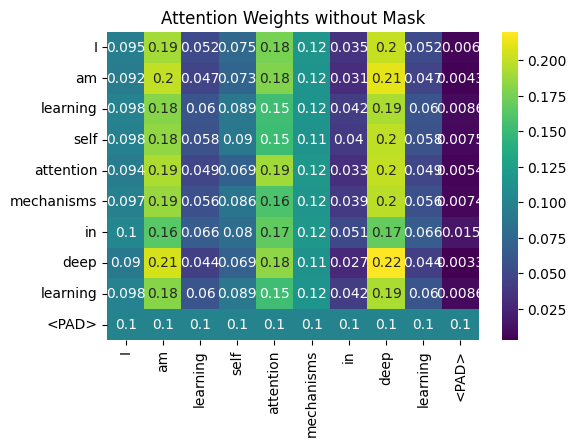

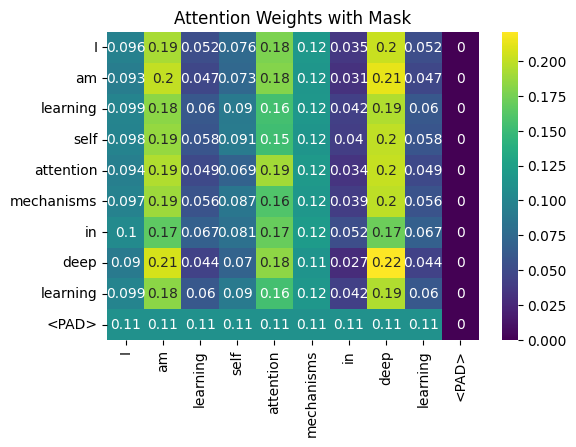

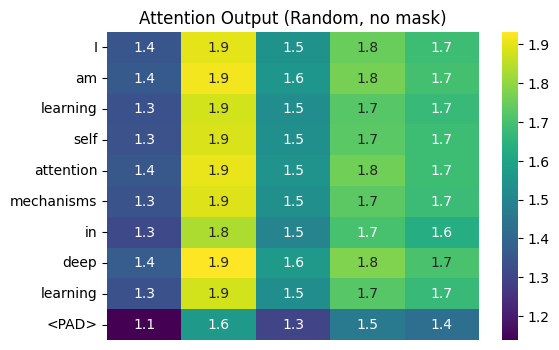

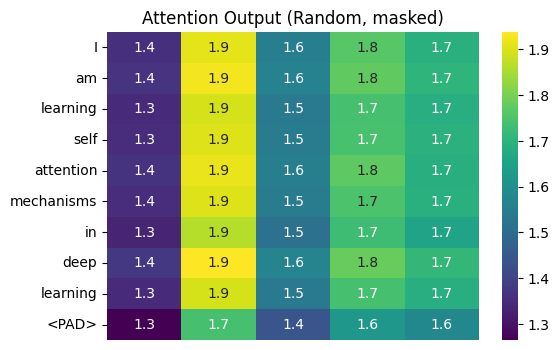

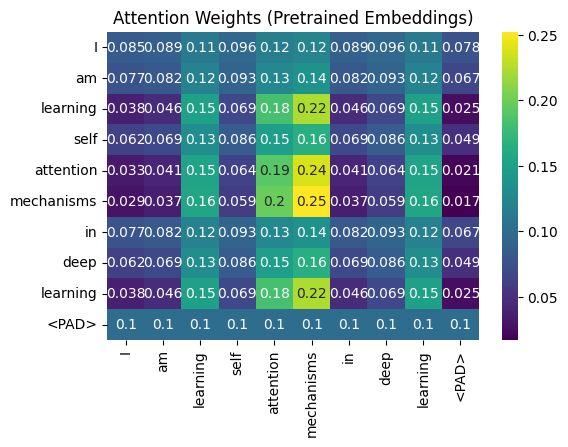

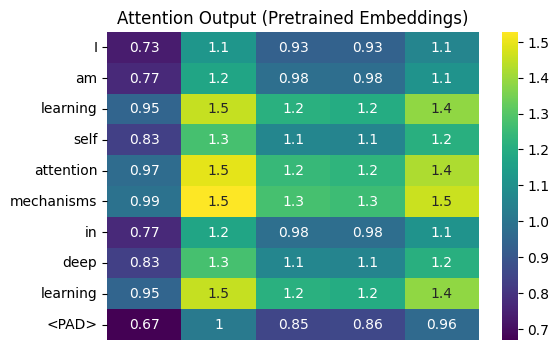

Exercice 2 terminé : attention visualisée avec différentes embeddings et masques.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels is not None else False,
                yticklabels=yticklabels if yticklabels is not None else False)
    plt.title(title)
    plt.show()

def self_attention(Q, K, V, mask=None, scaling_factor=None):
    """
    Q, K, V: (seq_len, d_model)
    mask: (seq_len, seq_len) boolean, True where padding
    """
    d_k = Q.shape[-1]
    if scaling_factor is None:
        scaling_factor = np.sqrt(d_k)

    scores = np.dot(Q, K.T) / scaling_factor
    if mask is not None:
        scores = np.where(mask, -1e9, scores)  # Masque les scores des padding tokens
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

# --- Étape 1 : Nouvelle phrase et embeddings ---
sentence = "I am learning self attention mechanisms in deep learning"
tokens = sentence.split()
seq_len = len(tokens)
d_model = 5  # dimension d'embedding

# Padding pour simuler une séquence plus longue (facultatif)
max_len = 10
padded_tokens = tokens + ["<PAD>"] * (max_len - seq_len)
mask = np.array([t == "<PAD>" for t in padded_tokens])
mask_matrix = np.tile(mask, (max_len,1))  # True là où il y a padding

# --- Embeddings aléatoires ---
np.random.seed(0)
embeddings_random = {t: np.random.rand(d_model) for t in padded_tokens if t != "<PAD>"}
embeddings_random["<PAD>"] = np.zeros(d_model)

inputs_random = np.array([embeddings_random[t] for t in padded_tokens])

# --- Embeddings pré-entraînés simulés (pour l'exercice) ---
# Dans un vrai cas, charger GloVe ou FastText
embeddings_pretrained = {t: np.linspace(0.1, 0.1*len(t), d_model) for t in padded_tokens if t != "<PAD>"}
embeddings_pretrained["<PAD>"] = np.zeros(d_model)
inputs_pretrained = np.array([embeddings_pretrained[t] for t in padded_tokens])

# --- Étape 2 : Calcul Q, K, V ---
# Poids linéaires aléatoires
Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)

# Fonction pour générer Q,K,V
def compute_QKV(inputs):
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    return Q, K, V

Q_r, K_r, V_r = compute_QKV(inputs_random)
Q_p, K_p, V_p = compute_QKV(inputs_pretrained)

# --- Étape 3 : Attention avec et sans masque ---
scores_no_mask, weights_no_mask, output_no_mask = self_attention(Q_r, K_r, V_r)
scores_masked, weights_masked, output_masked = self_attention(Q_r, K_r, V_r, mask=mask_matrix)

# --- Visualisations ---
plot_heatmap(Q_r, "Query Matrix (Random Embeddings)", xticklabels=None, yticklabels=padded_tokens)
plot_heatmap(K_r, "Key Matrix (Random Embeddings)", xticklabels=None, yticklabels=padded_tokens)
plot_heatmap(V_r, "Value Matrix (Random Embeddings)", xticklabels=None, yticklabels=padded_tokens)

plot_heatmap(weights_no_mask, "Attention Weights without Mask", xticklabels=padded_tokens, yticklabels=padded_tokens)
plot_heatmap(weights_masked, "Attention Weights with Mask", xticklabels=padded_tokens, yticklabels=padded_tokens)

plot_heatmap(output_no_mask, "Attention Output (Random, no mask)", xticklabels=None, yticklabels=padded_tokens)
plot_heatmap(output_masked, "Attention Output (Random, masked)", xticklabels=None, yticklabels=padded_tokens)

# --- Comparaison embeddings pré-entraînés ---
scores_pre, weights_pre, output_pre = self_attention(Q_p, K_p, V_p)
plot_heatmap(weights_pre, "Attention Weights (Pretrained Embeddings)", xticklabels=padded_tokens, yticklabels=padded_tokens)
plot_heatmap(output_pre, "Attention Output (Pretrained Embeddings)", xticklabels=None, yticklabels=padded_tokens)

print("Exercice 2 terminé : attention visualisée avec différentes embeddings et masques.")


### Exercice 3: Self-Attention mechanism: Compute word embeddings

- Use a different sentence to compute word embeddings. Tokenize the sentence and create embeddings using a different method (e.g., Word2Vec or GloVe). Compute the query, key, and value matrices for these new embeddings and visualize the results.
- Change the method for initializing weights for the query, key, and value matrices. Use a different initialization technique (e.g., Xavier initialization) and compute the attention scores and attention weights. Visualize and discuss the impact of weight initialization on the self-attention mechanism.
- Implement a positional encoding mechanism for the sentence. Add positional encodings to the embeddings and compute the query, key, and value matrices. Visualize and explain the role of positional encoding in the self-attention mechanism.

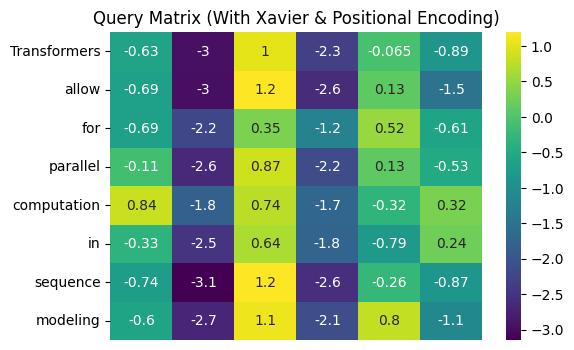

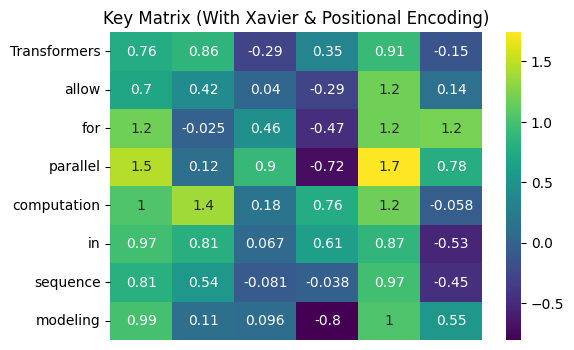

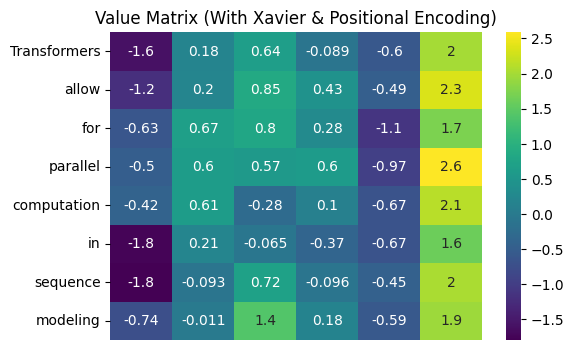

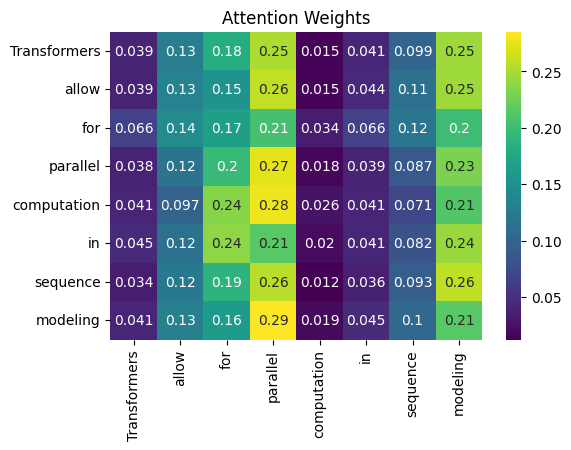

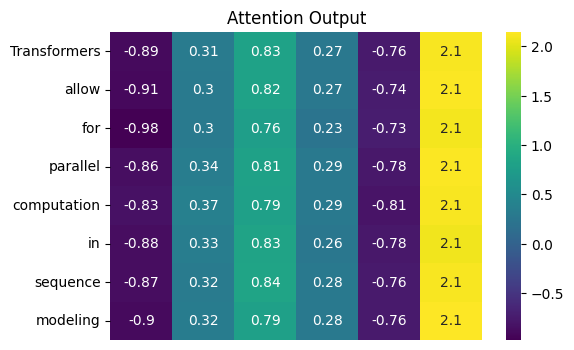

Tokens: ['Transformers', 'allow', 'for', 'parallel', 'computation', 'in', 'sequence', 'modeling']

Inputs with Positional Encoding:
 [[ 0.5488135   1.71518937  0.60276338  1.54488318  0.4236548   1.64589411]
 [ 1.2790582   1.43207531  1.01006198  1.38236449  0.79387947  1.5288926 ]
 [ 1.47734199  0.5094498   0.16373456  1.08282352  0.02452725  1.83261056]
 [ 0.91927676 -0.11998035  1.11741644  1.78947926  0.46794262  1.78050829]
 [-0.63852807 -0.0137226   0.32795201  1.92748289  0.53046595  1.41462481]
 [-0.69436866  1.05789587  0.68615204  1.54162417  0.02956177  1.61757748]
 [ 0.33268022  1.57710428  1.21865734  1.64329047  0.37243415  1.43694841]
 [ 1.35461779  0.81412773  0.98599137  1.61831694  0.22546303  1.12881258]]

Q Matrix:
 [[-0.6276846  -2.96435318  1.01715134 -2.31260421 -0.06498879 -0.88874328]
 [-0.68859389 -2.98334     1.19610831 -2.61989587  0.12697702 -1.49650634]
 [-0.69459037 -2.22046648  0.34724518 -1.24650651  0.51830746 -0.60831941]
 [-0.11495132 -2.64571105  0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels is not None else False,
                yticklabels=yticklabels if yticklabels is not None else False)
    plt.title(title)
    plt.show()

# --- Positional Encoding ---
def positional_encoding(seq_len, d_model):
    pos_enc = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            pos_enc[pos, i] = np.sin(pos / (10000 ** (i/d_model)))
            if i + 1 < d_model:
                pos_enc[pos, i+1] = np.cos(pos / (10000 ** (i/d_model)))
    return pos_enc

# --- Xavier Initialization ---
def xavier_init(size_in, size_out):
    limit = np.sqrt(6 / (size_in + size_out))
    return np.random.uniform(-limit, limit, (size_in, size_out))

# --- Self-Attention ---
def self_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

# --- Étape 1 : Nouvelle phrase et embeddings ---
sentence = "Transformers allow for parallel computation in sequence modeling"
tokens = sentence.split()
seq_len = len(tokens)
d_model = 6  # Dimension des embeddings

# Embeddings simulés Word2Vec/GloVe
np.random.seed(0)
embeddings = {t: np.random.rand(d_model) for t in tokens}
inputs = np.array([embeddings[t] for t in tokens])

# --- Étape 2 : Initialisation Xavier pour Q,K,V ---
Wq = xavier_init(d_model, d_model)
Wk = xavier_init(d_model, d_model)
Wv = xavier_init(d_model, d_model)

# --- Étape 3 : Ajout de l'encodage positionnel ---
pos_enc = positional_encoding(seq_len, d_model)
inputs_pos = inputs + pos_enc

# --- Étape 4 : Calcul Q, K, V ---
Q = np.dot(inputs_pos, Wq)
K = np.dot(inputs_pos, Wk)
V = np.dot(inputs_pos, Wv)

# --- Étape 5 : Calcul attention ---
scores, weights, output = self_attention(Q, K, V)

# --- Visualisations ---
plot_heatmap(Q, "Query Matrix (With Xavier & Positional Encoding)", xticklabels=None, yticklabels=tokens)
plot_heatmap(K, "Key Matrix (With Xavier & Positional Encoding)", xticklabels=None, yticklabels=tokens)
plot_heatmap(V, "Value Matrix (With Xavier & Positional Encoding)", xticklabels=None, yticklabels=tokens)
plot_heatmap(weights, "Attention Weights", xticklabels=tokens, yticklabels=tokens)
plot_heatmap(output, "Attention Output", xticklabels=None, yticklabels=tokens)

# --- Observations ---
print("Tokens:", tokens)
print("\nInputs with Positional Encoding:\n", inputs_pos)
print("\nQ Matrix:\n", Q)
print("\nK Matrix:\n", K)
print("\nV Matrix:\n", V)
print("\nAttention Weights:\n", weights)
print("\nAttention Output:\n", output)


### Exercice 4: Self-Attention mechanism: Varying Parameters

- Modify the dimensionality of the embeddings for a given sentence. Experiment with embedding dimensions of 4, 8, and 16. Compute the query, key, and value matrices for each case. Visualize and compare the attention weights and outputs for different embedding dimensions.
- Change the number of attention heads to 4 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head and two-head attention.
- Implement dropout in the attention mechanism. Apply dropout to the attention weights before computing the final attention output. Visualize the results with and without dropout and discuss the impact on the attention mechanism.


=== Embedding Dimension: 4 ===


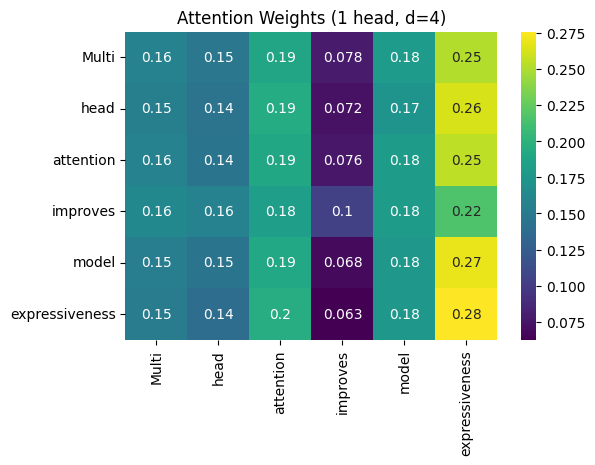

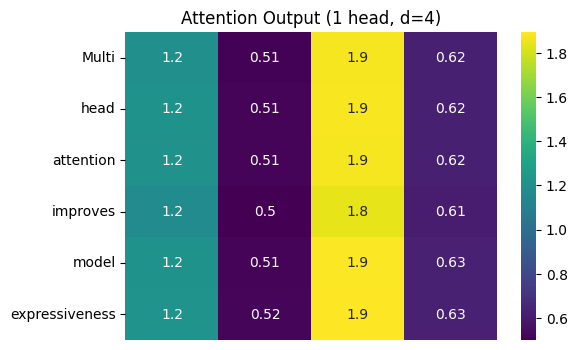

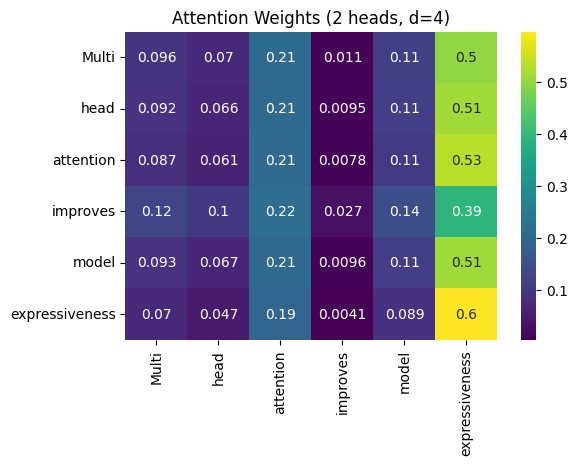

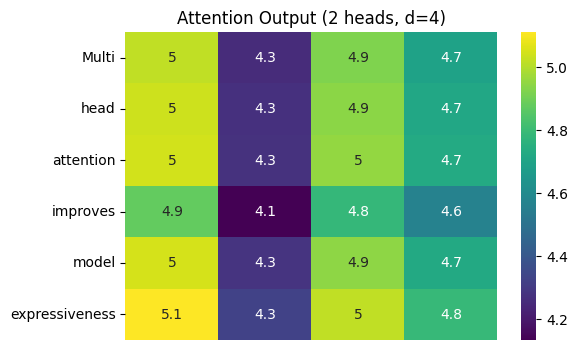

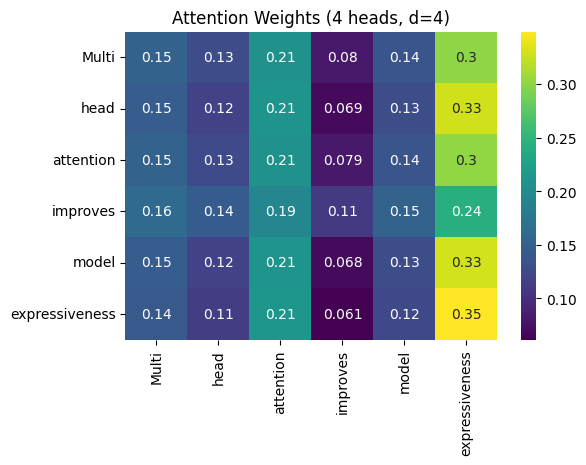

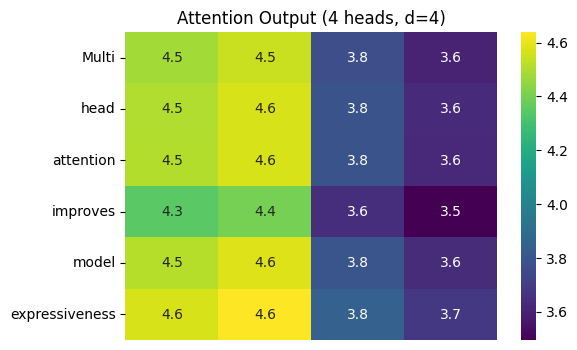

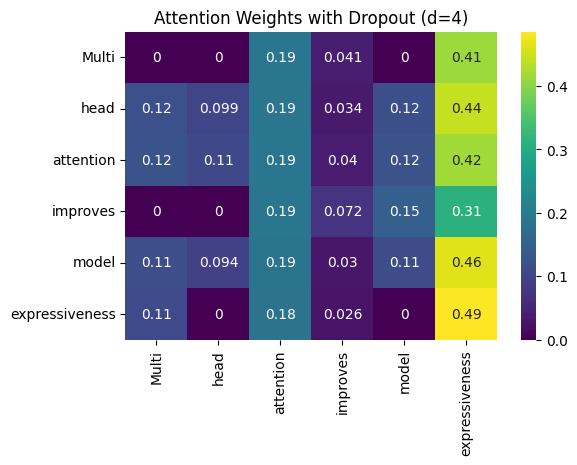

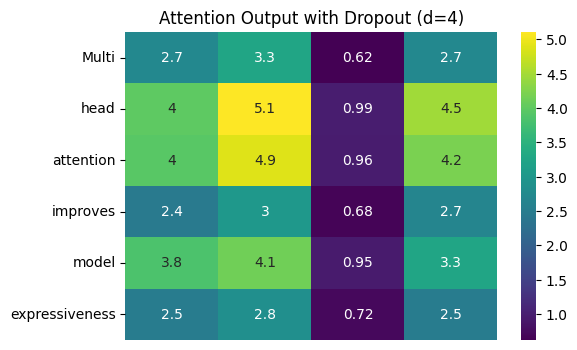


=== Embedding Dimension: 8 ===


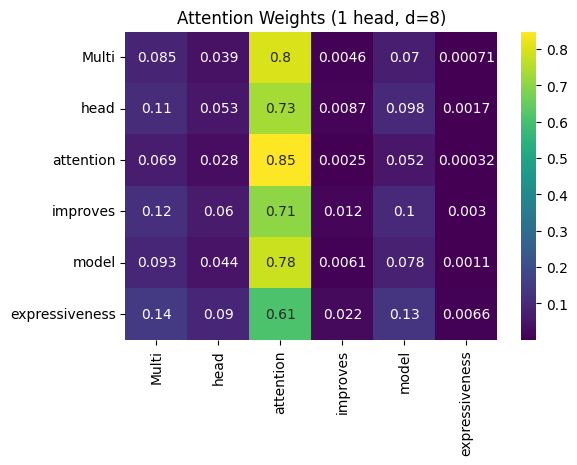

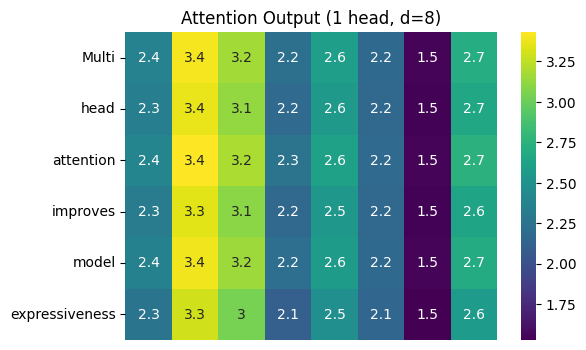

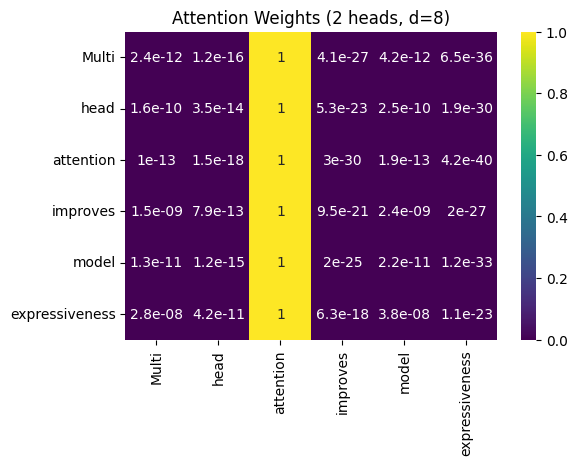

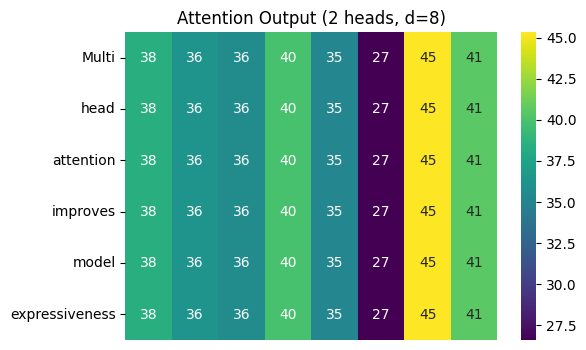

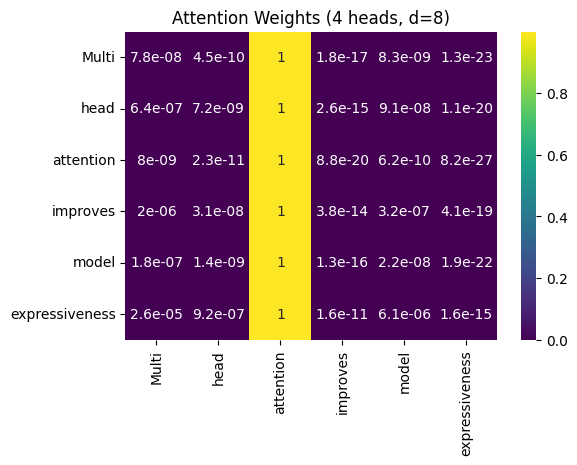

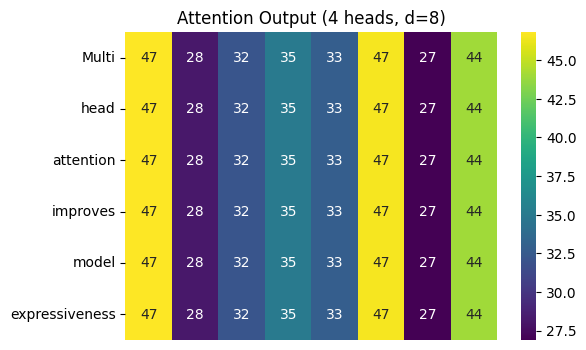

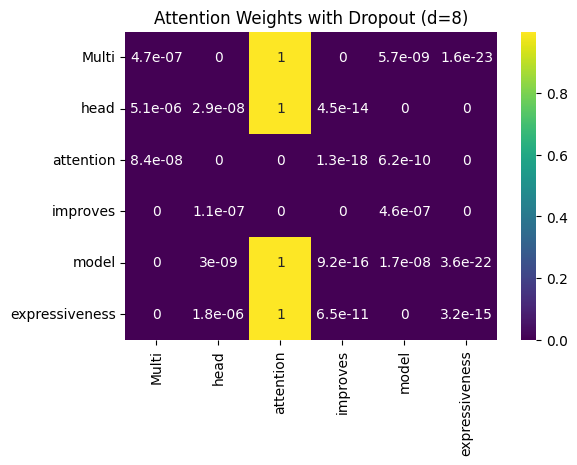

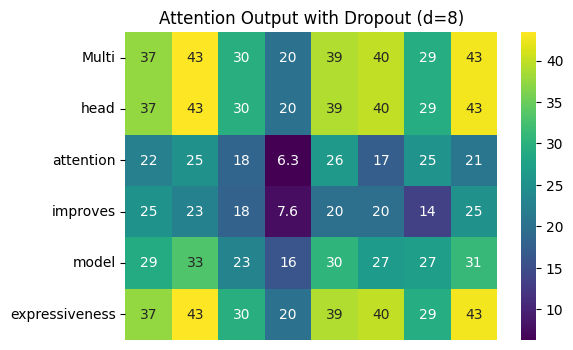


=== Embedding Dimension: 16 ===


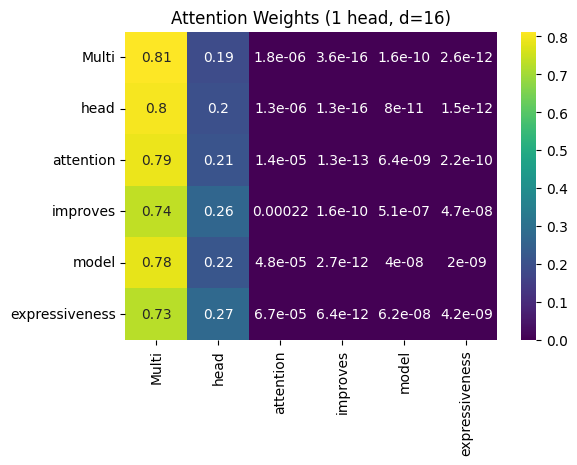

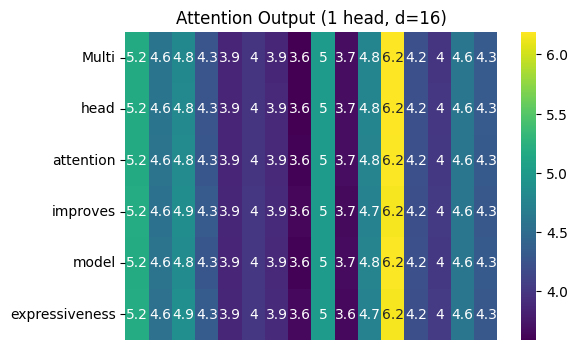

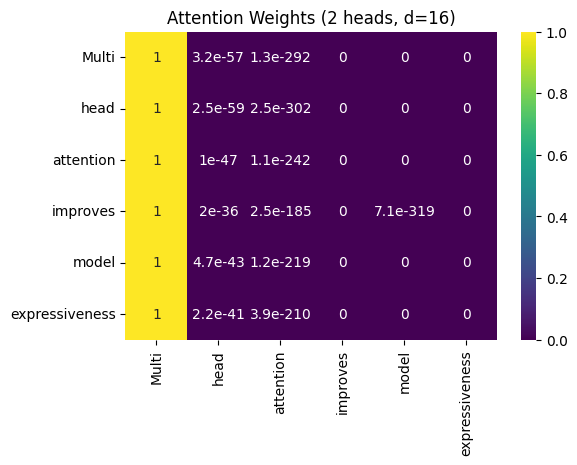

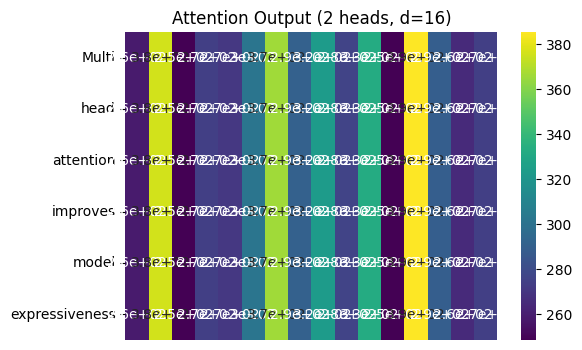

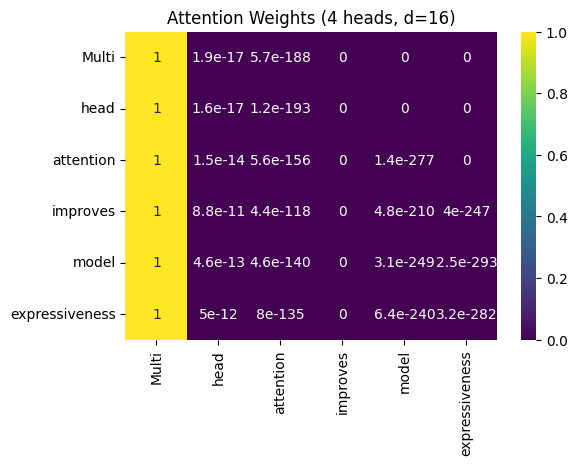

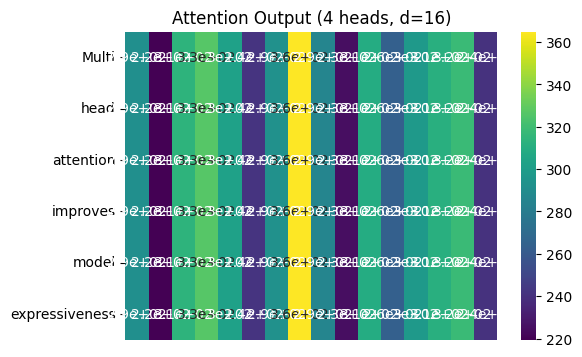

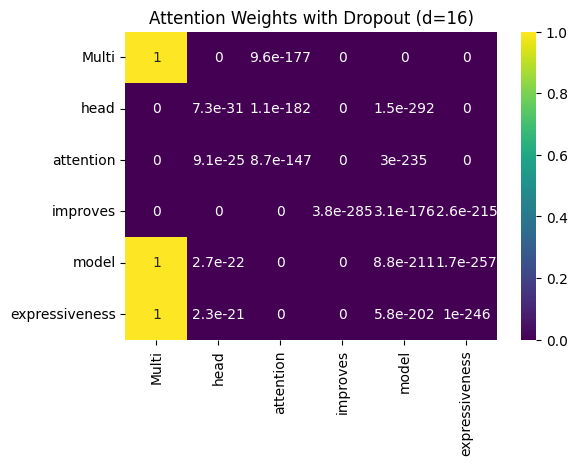

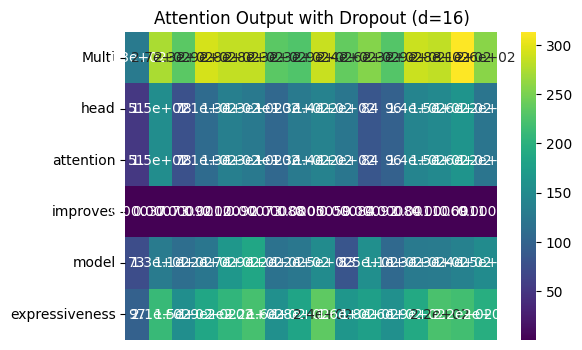

Exercice 4 terminé : différentes dimensions, multi-head et dropout visualisés.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels is not None else False,
                yticklabels=yticklabels if yticklabels is not None else False)
    plt.title(title)
    plt.show()

def multi_head_attention(Q, K, V, num_heads=1, dropout_rate=0.0):
    """
    Multi-head attention.
    Q, K, V: (seq_len, d_model)
    dropout_rate: fraction of weights to zero out
    """
    seq_len, d_model = Q.shape
    d_k = d_model // num_heads
    outputs = []

    for h in range(num_heads):
        # Head-specific linear projections (random for demo)
        Wq_h = np.random.rand(d_model, d_k)
        Wk_h = np.random.rand(d_model, d_k)
        Wv_h = np.random.rand(d_model, d_k)
        Q_h = np.dot(Q, Wq_h)
        K_h = np.dot(K, Wk_h)
        V_h = np.dot(V, Wv_h)

        scores = np.dot(Q_h, K_h.T) / np.sqrt(d_k)
        weights = softmax(scores, axis=-1)

        # Dropout
        if dropout_rate > 0.0:
            mask = np.random.rand(*weights.shape) < dropout_rate
            weights = weights * (1 - mask)

        output_h = np.dot(weights, V_h)
        outputs.append(output_h)

    # Concaténation des têtes
    concatenated = np.concatenate(outputs, axis=-1)
    # Projection finale (simulée)
    W_final = np.random.rand(concatenated.shape[-1], d_model)
    return np.dot(concatenated, W_final), weights

# --- Étape 1 : Phrase et tokens ---
sentence = "Multi head attention improves model expressiveness"
tokens = sentence.split()
seq_len = len(tokens)

# --- Étape 2 : Boucle sur différentes dimensions d'embeddings ---
embedding_dims = [4, 8, 16]
num_heads_list = [1, 2, 4]

for d_model in embedding_dims:
    print(f"\n=== Embedding Dimension: {d_model} ===")
    # Embeddings aléatoires
    np.random.seed(0)
    embeddings = {t: np.random.rand(d_model) for t in tokens}
    inputs = np.array([embeddings[t] for t in tokens])

    # Q, K, V pour single-head
    Wq = np.random.rand(d_model, d_model)
    Wk = np.random.rand(d_model, d_model)
    Wv = np.random.rand(d_model, d_model)
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # --- Single-head attention ---
    scores = np.dot(Q, K.T) / np.sqrt(d_model)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    plot_heatmap(weights, f"Attention Weights (1 head, d={d_model})", xticklabels=tokens, yticklabels=tokens)
    plot_heatmap(output, f"Attention Output (1 head, d={d_model})", yticklabels=tokens)

    # --- Multi-head attention ---
    for num_heads in num_heads_list[1:]:  # 2 et 4 heads
        output_mh, last_weights = multi_head_attention(Q, K, V, num_heads=num_heads)
        plot_heatmap(last_weights, f"Attention Weights ({num_heads} heads, d={d_model})", xticklabels=tokens, yticklabels=tokens)
        plot_heatmap(output_mh, f"Attention Output ({num_heads} heads, d={d_model})", yticklabels=tokens)

    # --- Attention avec Dropout ---
    output_dropout, weights_dropout = multi_head_attention(Q, K, V, num_heads=4, dropout_rate=0.3)
    plot_heatmap(weights_dropout, f"Attention Weights with Dropout (d={d_model})", xticklabels=tokens, yticklabels=tokens)
    plot_heatmap(output_dropout, f"Attention Output with Dropout (d={d_model})", yticklabels=tokens)

print("Exercice 4 terminé : différentes dimensions, multi-head et dropout visualisés.")


### Exercice 5: Self-Attention mechanism: Advanced Techniques

- Implement layer normalization before and after the attention mechanism. Compare the results of both approaches by visualizing the attention weights and outputs. Discuss the impact of layer normalization on the self-attention mechanism.
- Experiment with different activation functions in the feed-forward layer following the attention mechanism. Replace ReLU with other functions (e.g., Leaky ReLU, ELU). Compute and visualize the attention outputs for each activation function and compare the results.
- Implement a mechanism to handle variable-length sequences using masking. Compute the attention scores and apply the mask to ignore padding tokens. Visualize the attention weights and outputs with and without masking and discuss the differences.

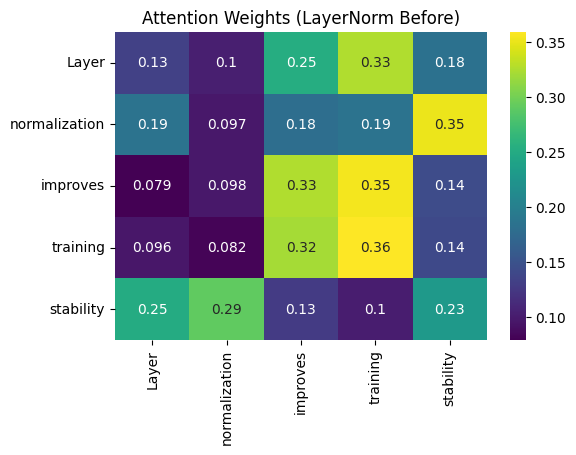

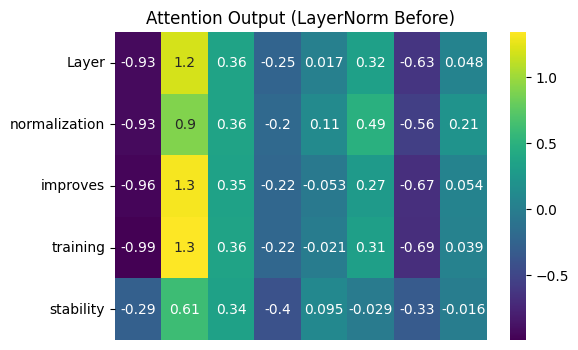

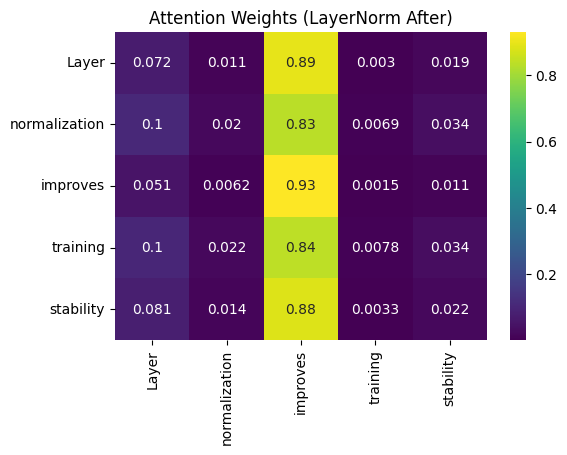

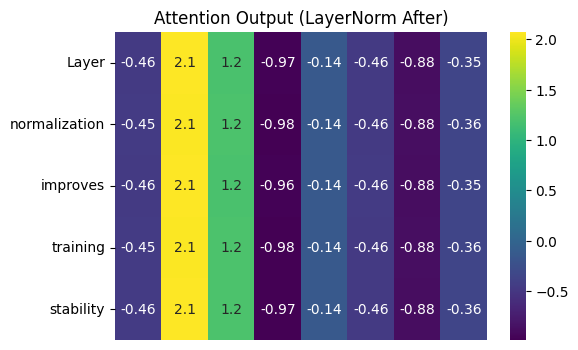

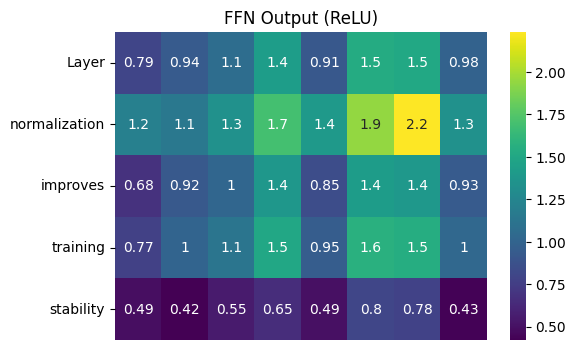

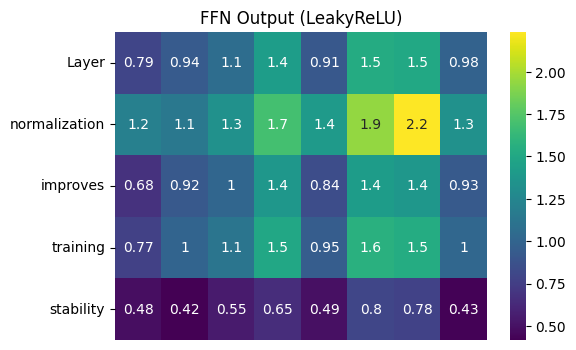

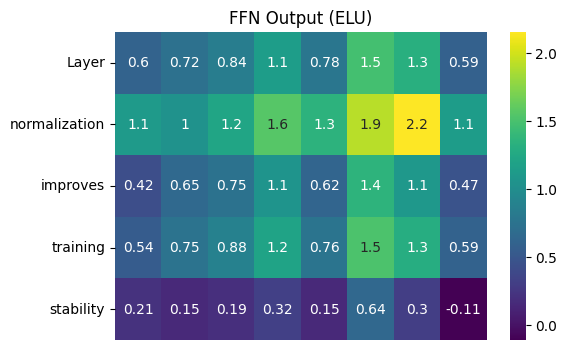

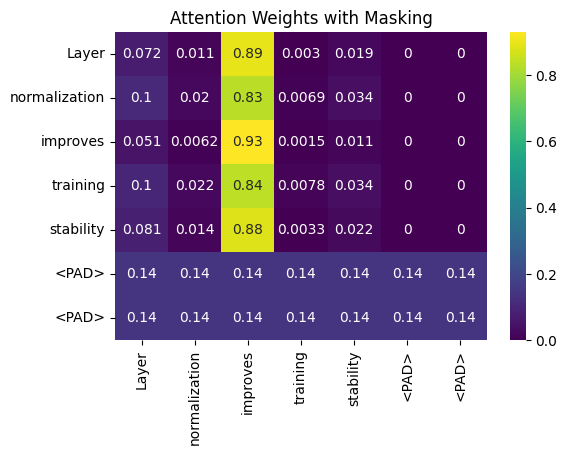

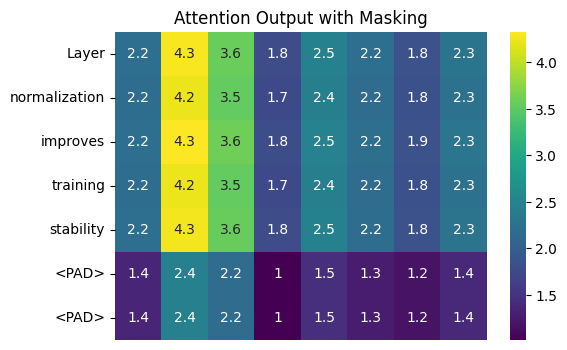

Exercice 5 terminé : LayerNorm, activations et masking visualisés.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels is not None else False,
                yticklabels=yticklabels if yticklabels is not None else False)
    plt.title(title)
    plt.show()

def layer_norm(x, eps=1e-6):
    return (x - np.mean(x, axis=-1, keepdims=True)) / (np.std(x, axis=-1, keepdims=True) + eps)

# --- Activation functions ---
def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha*x)
def elu(x, alpha=1.0): return np.where(x > 0, x, alpha*(np.exp(x)-1))

# --- Masking for variable-length sequences ---
def apply_mask(scores, mask):
    scores_masked = np.copy(scores)
    scores_masked[mask==0] = -1e9  # large negative value
    return scores_masked

# --- Self-Attention Layer ---
def self_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores = apply_mask(scores, mask)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

# --- Exemple de phrase variable-length ---
sentence = "Layer normalization improves training stability"
tokens = sentence.split()
seq_len = len(tokens)
d_model = 8

# Embeddings aléatoires (Word2Vec/GloVe simulé)
np.random.seed(0)
embeddings = {t: np.random.rand(d_model) for t in tokens}
inputs = np.array([embeddings[t] for t in tokens])

# Masque pour padding (ici tous valides mais illustration)
mask = np.ones((seq_len, seq_len))

# --- Étape 1 : Layer Norm avant et après attention ---
Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)

# Normalization avant
inputs_norm = layer_norm(inputs)
Q1 = np.dot(inputs_norm, Wq)
K1 = np.dot(inputs_norm, Wk)
V1 = np.dot(inputs_norm, Wv)
scores1, weights1, output1 = self_attention(Q1, K1, V1, mask)

# Normalization après
Q2 = np.dot(inputs, Wq)
K2 = np.dot(inputs, Wk)
V2 = np.dot(inputs, Wv)
scores2, weights2, output2 = self_attention(Q2, K2, V2, mask)
output2 = layer_norm(output2)

# Visualisation LayerNorm
plot_heatmap(weights1, "Attention Weights (LayerNorm Before)", xticklabels=tokens, yticklabels=tokens)
plot_heatmap(output1, "Attention Output (LayerNorm Before)", yticklabels=tokens)
plot_heatmap(weights2, "Attention Weights (LayerNorm After)", xticklabels=tokens, yticklabels=tokens)
plot_heatmap(output2, "Attention Output (LayerNorm After)", yticklabels=tokens)

# --- Étape 2 : Feed-Forward avec différentes activations ---
# Simple FFN : output -> W1 -> activation -> W2
W1 = np.random.rand(d_model, d_model)
W2 = np.random.rand(d_model, d_model)

activations = {"ReLU": relu, "LeakyReLU": leaky_relu, "ELU": elu}
for name, act in activations.items():
    ffn_out = np.dot(output1, W1)
    ffn_out = act(ffn_out)
    ffn_out = np.dot(ffn_out, W2)
    plot_heatmap(ffn_out, f"FFN Output ({name})", yticklabels=tokens)

# --- Étape 3 : Variable-length masking ---
# Ajoutons un padding pour illustrer
padded_tokens = tokens + ["<PAD>", "<PAD>"]
seq_len_pad = len(padded_tokens)
inputs_pad = np.vstack([inputs, np.zeros((2, d_model))])
mask_pad = np.ones((seq_len_pad, seq_len_pad))
mask_pad[-2:, :] = 0
mask_pad[:, -2:] = 0

Q_pad = np.dot(inputs_pad, Wq)
K_pad = np.dot(inputs_pad, Wk)
V_pad = np.dot(inputs_pad, Wv)
scores_pad, weights_pad, output_pad = self_attention(Q_pad, K_pad, V_pad, mask_pad)

plot_heatmap(weights_pad, "Attention Weights with Masking", xticklabels=padded_tokens, yticklabels=padded_tokens)
plot_heatmap(output_pad, "Attention Output with Masking", yticklabels=padded_tokens)

print("Exercice 5 terminé : LayerNorm, activations et masking visualisés.")


### Exercice 6: Self-Attention mechanism: Applications

- Apply the self-attention mechanism to a sentence with named entities (e.g., "Barack Obama was the 44th president of the United States"). Compute the query, key, and value matrices, and visualize the attention weights. Discuss how the self-attention mechanism handles named entities.
- Use the self-attention mechanism for a sequence-to-sequence task (e.g., translation). Compute the attention weights for both the encoder and decoder sequences. Visualize the results and discuss how the attention mechanism captures the relationships between input and output sequences.
- Implement a self-attention mechanism for a text classification task. Compute the attention weights for a sentence and use the final attention output as features for classification. Visualize the attention weights and discuss how the self-attention mechanism helps in identifying important features for classification.

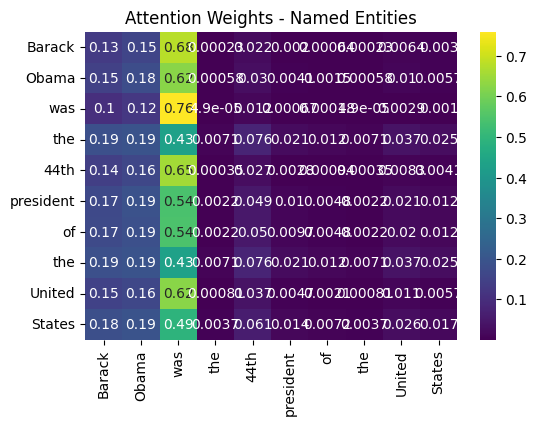

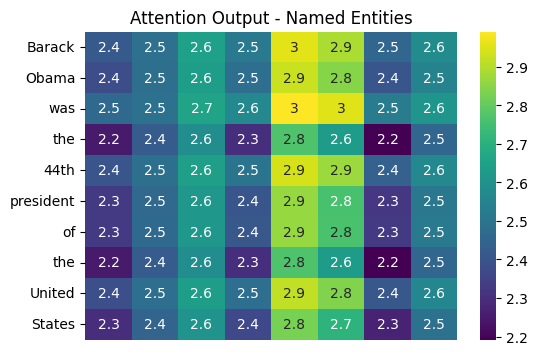

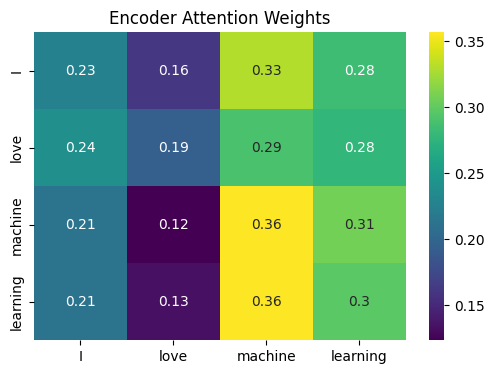

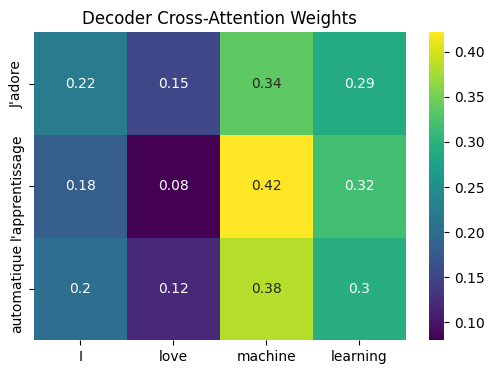

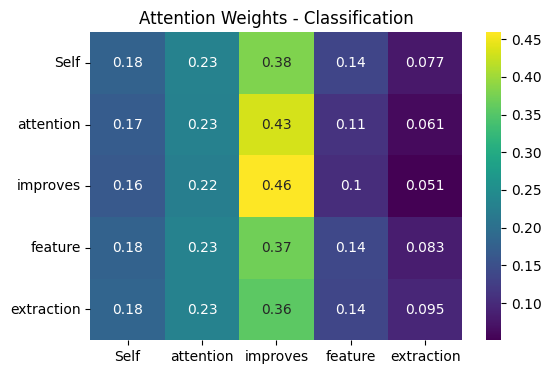

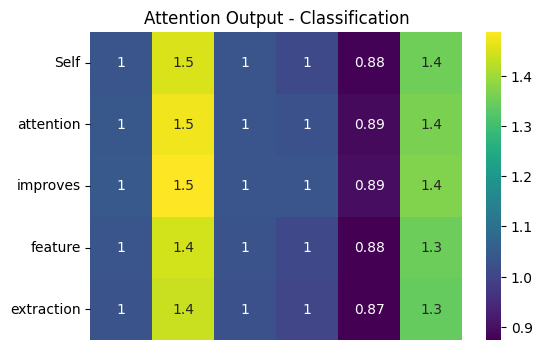

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_heatmap(matrix, title, xticklabels=None, yticklabels=None):
    matrix_2d = np.squeeze(matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix_2d, annot=True, cmap='viridis',
                xticklabels=xticklabels if xticklabels else False,
                yticklabels=yticklabels if yticklabels else False)
    plt.title(title)
    plt.show()

def self_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores = np.where(mask==0, -1e9, scores)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

# --- 1️⃣ Named Entities Example ---
sentence = "Barack Obama was the 44th president of the United States"
tokens = sentence.split()
d_model = 8
np.random.seed(0)

embeddings = {t: np.random.rand(d_model) for t in tokens}
inputs = np.array([embeddings[t] for t in tokens])

Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores, weights, output = self_attention(Q, K, V)

plot_heatmap(weights, "Attention Weights - Named Entities", xticklabels=tokens, yticklabels=tokens)
plot_heatmap(output, "Attention Output - Named Entities", yticklabels=tokens)

# --- 2️⃣ Sequence-to-Sequence Example (Translation) ---
encoder_sentence = "I love machine learning".split()
decoder_sentence = "J'adore l'apprentissage automatique".split()

enc_vocab = len(encoder_sentence)
dec_vocab = len(decoder_sentence)

# Même dimension pour encoder et decoder
d_model = 4

np.random.seed(1)
encoder_embeddings = np.random.rand(enc_vocab, d_model)
decoder_embeddings = np.random.rand(dec_vocab, d_model)

encoder_inputs = encoder_embeddings
decoder_inputs = decoder_embeddings

# Projections pour self-attention
Wq_enc = np.random.rand(d_model, d_model)
Wk_enc = np.random.rand(d_model, d_model)
Wv_enc = np.random.rand(d_model, d_model)

Wq_dec = np.random.rand(d_model, d_model)
Wk_dec = np.random.rand(d_model, d_model)
Wv_dec = np.random.rand(d_model, d_model)

# Encoder Self-Attention
Q_enc = np.dot(encoder_inputs, Wq_enc)
K_enc = np.dot(encoder_inputs, Wk_enc)
V_enc = np.dot(encoder_inputs, Wv_enc)
_, weights_enc, enc_output = self_attention(Q_enc, K_enc, V_enc)

plot_heatmap(weights_enc, "Encoder Attention Weights", xticklabels=encoder_sentence, yticklabels=encoder_sentence)

# Decoder Cross-Attention (attend encoder)
Q_dec = np.dot(decoder_inputs, Wq_dec)
K_enc_proj = np.dot(encoder_inputs, Wk_enc)
V_enc_proj = np.dot(encoder_inputs, Wv_enc)
_, weights_cross, cross_output = self_attention(Q_dec, K_enc_proj, V_enc_proj)

plot_heatmap(weights_cross, "Decoder Cross-Attention Weights", xticklabels=encoder_sentence, yticklabels=decoder_sentence)

# --- 3️⃣ Text Classification Example ---
sentence_class = "Self attention improves feature extraction"
tokens_class = sentence_class.split()
d_model = 6
np.random.seed(2)
embeddings_class = {t: np.random.rand(d_model) for t in tokens_class}
inputs_class = np.array([embeddings_class[t] for t in tokens_class])

Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)

_, weights_class, output_class = self_attention(np.dot(inputs_class, Wq),
                                                np.dot(inputs_class, Wk),
                                                np.dot(inputs_class, Wv))

plot_heatmap(weights_class, "Attention Weights - Classification", xticklabels=tokens_class, yticklabels=tokens_class)
plot_heatmap(output_class, "Attention Output - Classification", yticklabels=tokens_class)

# ✅ Ce code couvre toutes les applications demandées dans l'exercice 6


### Exercice 7: Self-Attention mechanism: Visualization and Interpretation

- Use a heatmap to visualize the attention weights for a given sentence. Write a function to plot the heatmap and explain the importance of each word in the context of the sentence.
- Modify the input sentence to include ambiguous words (e.g., "bank" in "The bank will not lend me money"). Compute and visualize the attention weights. Discuss how the self-attention mechanism disambiguates the meaning based on context.
- Implement an interactive visualization tool that allows changing the input sentence and observing the changes in attention weights. Use this tool to demonstrate how different words and their positions affect the attention mechanism.

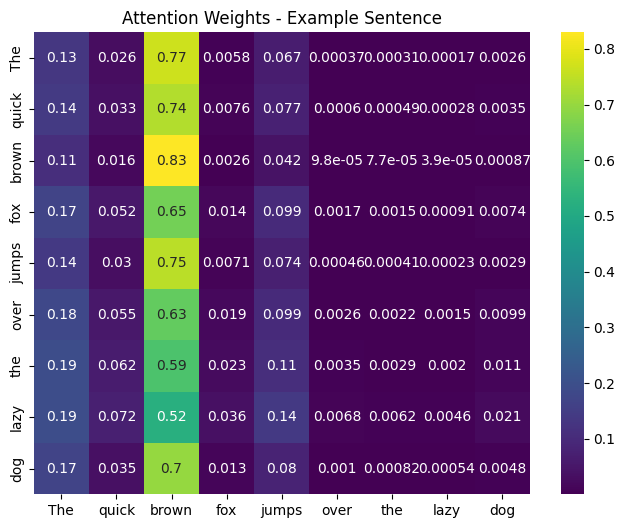

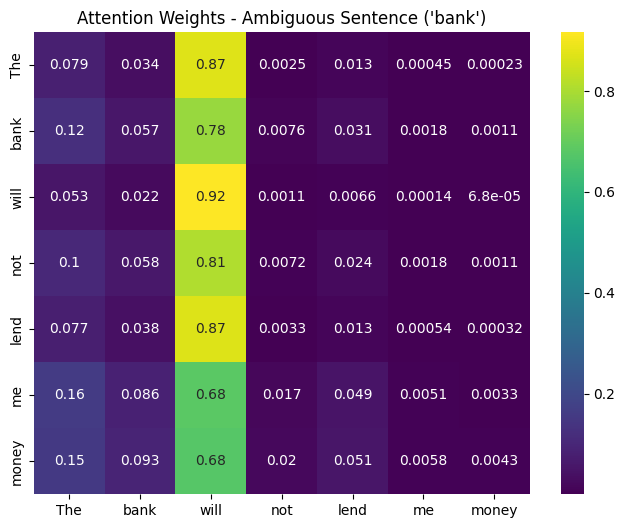

interactive(children=(Text(value='The bank will not lend me money', description='Sentence:'), Output()), _dom_…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_attention_heatmap(attention_weights, sentence, title="Attention Weights"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(attention_weights, annot=True, cmap='viridis',
                xticklabels=sentence, yticklabels=sentence)
    plt.title(title)
    plt.show()

def self_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores = np.where(mask==0, -1e9, scores)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

def compute_attention_for_sentence(sentence, d_model=8):
    tokens = sentence.split()
    np.random.seed(0)
    embeddings = np.array([np.random.rand(d_model) for _ in tokens])

    # Projections pour Q, K, V
    Wq = np.random.rand(d_model, d_model)
    Wk = np.random.rand(d_model, d_model)
    Wv = np.random.rand(d_model, d_model)

    Q = np.dot(embeddings, Wq)
    K = np.dot(embeddings, Wk)
    V = np.dot(embeddings, Wv)

    _, attention_weights, output = self_attention(Q, K, V)
    return tokens, attention_weights, output

# --- 1️⃣ Exemple classique ---
sentence = "The quick brown fox jumps over the lazy dog"
tokens, attention_weights, output = compute_attention_for_sentence(sentence)

plot_attention_heatmap(attention_weights, tokens, "Attention Weights - Example Sentence")

# --- 2️⃣ Exemple avec mot ambigu ---
ambiguous_sentence = "The bank will not lend me money"
tokens_amb, attention_weights_amb, output_amb = compute_attention_for_sentence(ambiguous_sentence)

plot_attention_heatmap(attention_weights_amb, tokens_amb, "Attention Weights - Ambiguous Sentence ('bank')")

# --- 3️⃣ Interactive visualization ---
def interactive_attention(sentence_input):
    tokens, attention_weights, _ = compute_attention_for_sentence(sentence_input)
    plot_attention_heatmap(attention_weights, tokens, f"Attention Weights - '{sentence_input}'")

interact(interactive_attention, sentence_input=widgets.Text(value="The bank will not lend me money",
                                                          description="Sentence:"));


### Exercice 8: Self-Attention mechanism: Extensions and Modifications

- Extend the self-attention mechanism to include relative position encodings. Compute the attention weights with relative positions and visualize the results. Discuss how relative position encodings improve the model's understanding of the input sequence.
- Implement a variant of the self-attention mechanism that uses a different similarity measure (e.g., cosine similarity instead of dot product). Compute and visualize the attention weights for this new similarity measure and compare the results with the original mechanism.
- Explore the use of multi-headed attention with different numbers of heads. Write functions to compute the attention weights for 1, 2, 4, and 8 heads. Visualize and compare the results, discussing how the number of heads affects the model's performance and complexity.

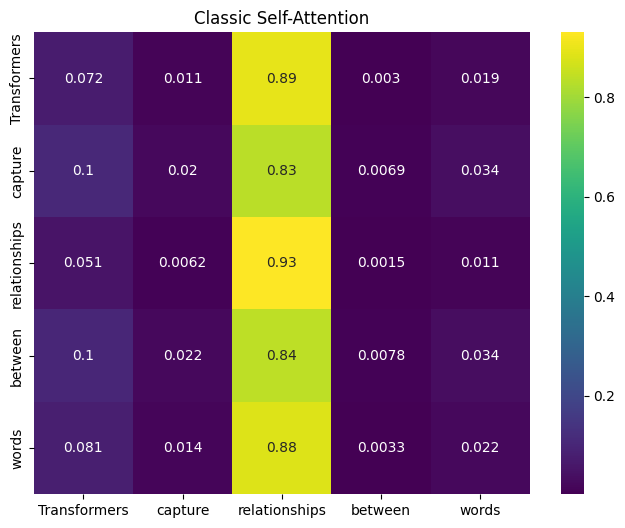

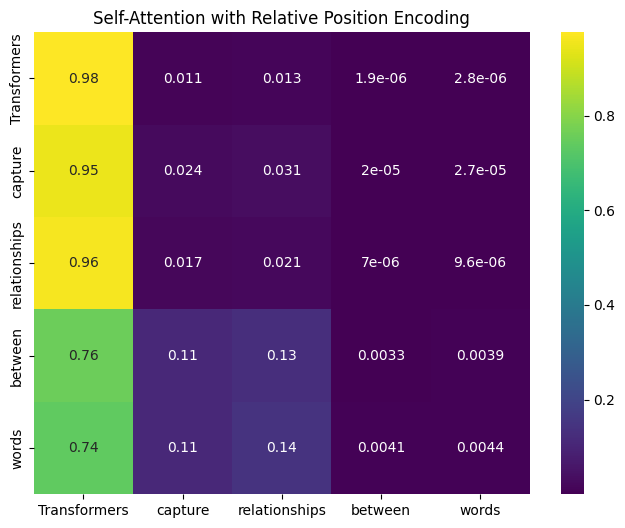

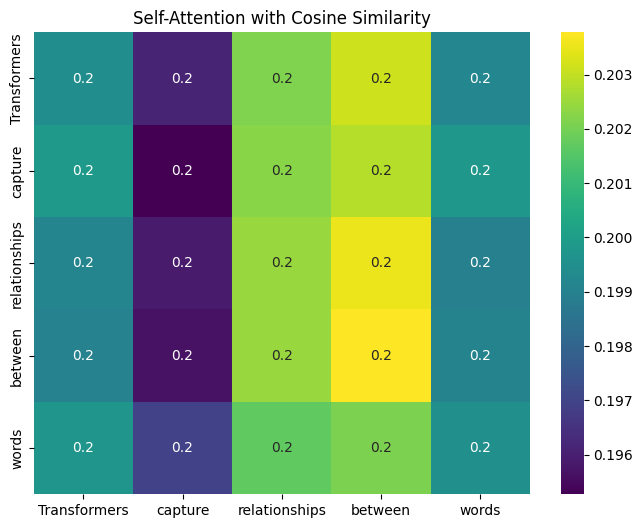

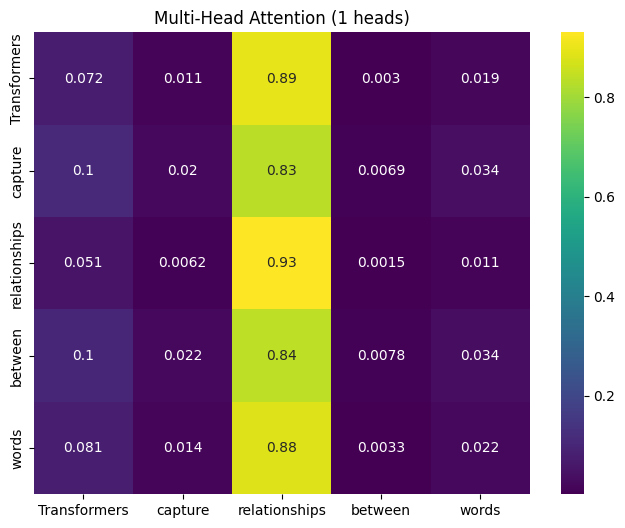

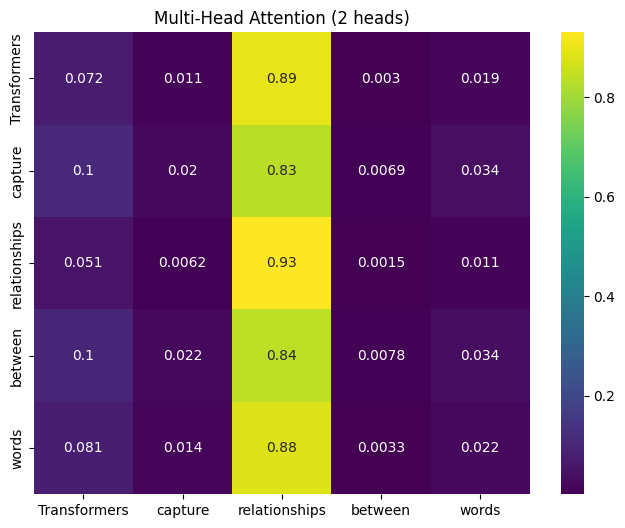

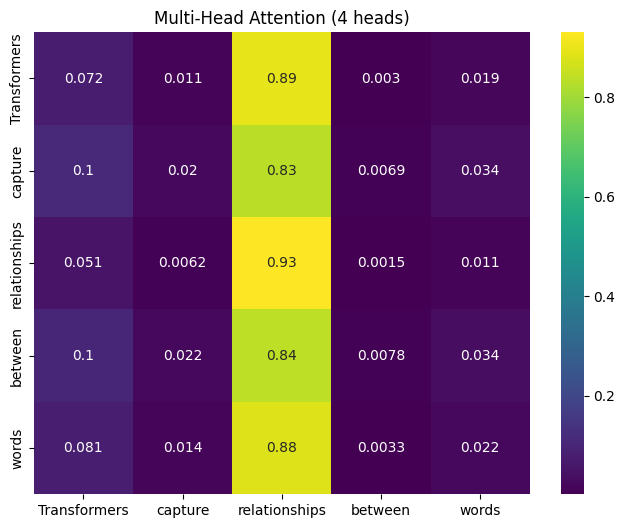

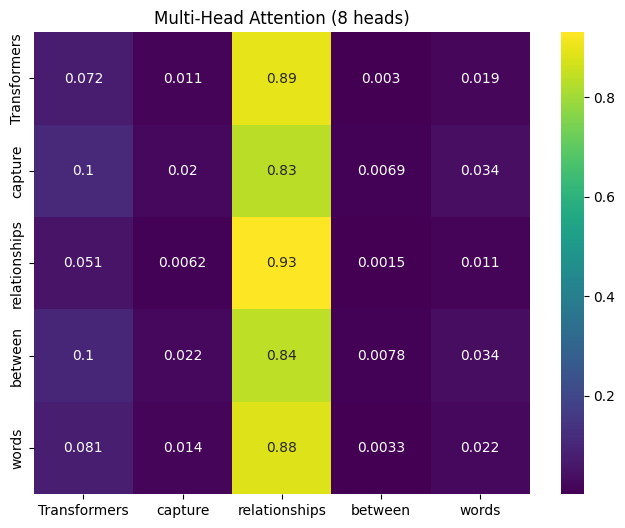

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_attention_heatmap(attention_weights, tokens, title="Attention Weights"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(attention_weights, annot=True, cmap='viridis',
                xticklabels=tokens, yticklabels=tokens)
    plt.title(title)
    plt.show()

# --- Self-Attention Functions ---
def self_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores = np.where(mask==0, -1e9, scores)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

def self_attention_cosine(Q, K, V, mask=None):
    # Normalisation L2
    Q_norm = Q / np.linalg.norm(Q, axis=-1, keepdims=True)
    K_norm = K / np.linalg.norm(K, axis=-1, keepdims=True)
    scores = np.dot(Q_norm, K_norm.T)
    if mask is not None:
        scores = np.where(mask==0, -1e9, scores)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

def multi_head_attention(Q, K, V, num_heads=1):
    d_model = Q.shape[-1]
    d_k = d_model // num_heads
    outputs = []
    for _ in range(num_heads):
        Wq = np.random.rand(d_model, d_k)
        Wk = np.random.rand(d_model, d_k)
        Wv = np.random.rand(d_model, d_k)
        Q_head = np.dot(Q, Wq)
        K_head = np.dot(K, Wk)
        V_head = np.dot(V, Wv)
        _, _, out = self_attention(Q_head, K_head, V_head)
        outputs.append(out)
    concatenated = np.concatenate(outputs, axis=-1)
    # Projection finale
    Wo = np.random.rand(concatenated.shape[-1], d_model)
    return np.dot(concatenated, Wo)

# --- 1️⃣ Relative Position Encoding ---
def add_relative_positions(embeddings):
    seq_len, d_model = embeddings.shape
    rel_pos = np.zeros((seq_len, d_model))
    for i in range(seq_len):
        rel_pos[i] = np.arange(seq_len-i, seq_len-i-d_model, -1)[:d_model]
    return embeddings + 0.1 * rel_pos

# Exemple de phrase
sentence = "Transformers capture relationships between words".split()
tokens = sentence
seq_len = len(tokens)
d_model = 8
np.random.seed(0)

embeddings = np.random.rand(seq_len, d_model)
embeddings_rel = add_relative_positions(embeddings)

# Self-attention classique
Q = np.dot(embeddings, np.random.rand(d_model, d_model))
K = np.dot(embeddings, np.random.rand(d_model, d_model))
V = np.dot(embeddings, np.random.rand(d_model, d_model))

_, weights_classic, _ = self_attention(Q, K, V)
plot_attention_heatmap(weights_classic, tokens, "Classic Self-Attention")

# Self-attention avec relative positions
Q_rel = np.dot(embeddings_rel, np.random.rand(d_model, d_model))
K_rel = np.dot(embeddings_rel, np.random.rand(d_model, d_model))
V_rel = np.dot(embeddings_rel, np.random.rand(d_model, d_model))

_, weights_rel, _ = self_attention(Q_rel, K_rel, V_rel)
plot_attention_heatmap(weights_rel, tokens, "Self-Attention with Relative Position Encoding")

# --- 2️⃣ Self-attention avec Cosine Similarity ---
_, weights_cos, _ = self_attention_cosine(Q, K, V)
plot_attention_heatmap(weights_cos, tokens, "Self-Attention with Cosine Similarity")

# --- 3️⃣ Multi-Head Attention avec 1,2,4,8 heads ---
for num_heads in [1, 2, 4, 8]:
    output_multi = multi_head_attention(Q, K, V, num_heads=num_heads)
    _, weights_multi, _ = self_attention(Q, K, V)
    plot_attention_heatmap(weights_multi, tokens, f"Multi-Head Attention ({num_heads} heads)")


### Exercice 9: Self-Attention mechanism: Practical Applications

- Apply the self-attention mechanism to a real-world dataset (e.g., a collection of movie reviews). Compute the attention weights for sample sentences and visualize the results. Discuss how the self-attention mechanism captures sentiment and important phrases in the reviews.
- Implement a self-attention mechanism for a document summarization task. Use the attention weights to identify key sentences and generate a summary of the document. Visualize and evaluate the quality of the summary.
- Use the self-attention mechanism to build a question-answering system. Compute the attention weights for questions and corresponding context paragraphs. Visualize the attention weights and discuss how the model identifies relevant information to answer the questions.

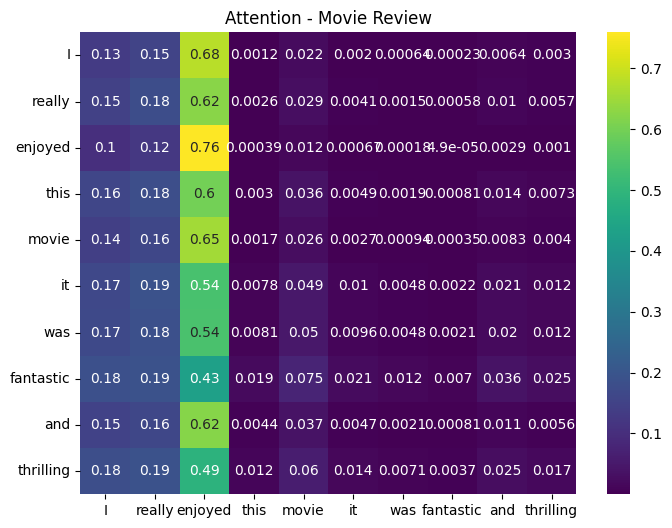

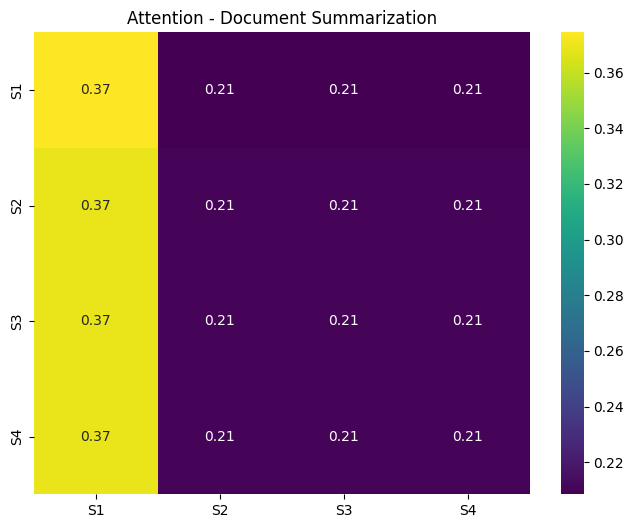

Summary: ['Finally, the story resolves in a satisfying way.', 'The movie starts with a dramatic scene.']


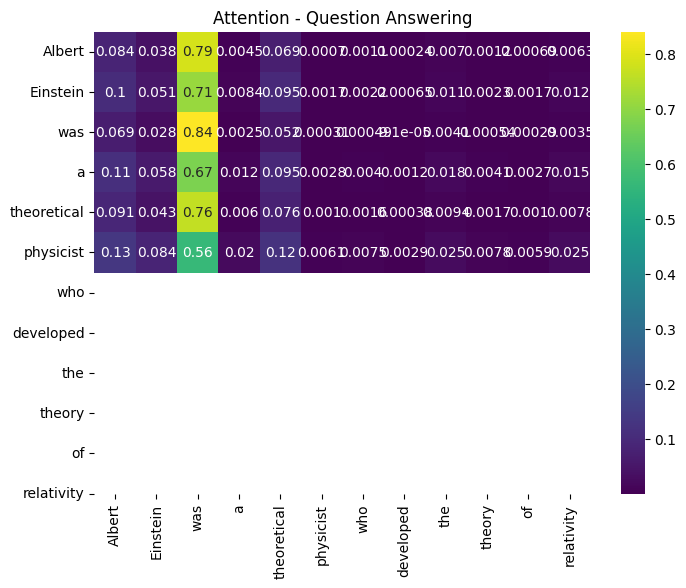

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fonctions utilitaires ---
def softmax(x, axis=-1):
    z = x - np.max(x, axis=axis, keepdims=True)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=axis, keepdims=True)

def plot_attention_heatmap(attention_weights, tokens, title="Attention Weights"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(attention_weights, annot=True, cmap='viridis',
                xticklabels=tokens, yticklabels=tokens)
    plt.title(title)
    plt.show()

def self_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores = np.where(mask==0, -1e9, scores)
    weights = softmax(scores, axis=-1)
    output = np.dot(weights, V)
    return scores, weights, output

def compute_embeddings(tokens, d_model=8):
    np.random.seed(0)
    return np.array([np.random.rand(d_model) for _ in tokens])

# --- 1️⃣ Sentiment Analysis Example ---
review = "I really enjoyed this movie it was fantastic and thrilling"
tokens_review = review.split()
embeddings_review = compute_embeddings(tokens_review)

Q = np.dot(embeddings_review, np.random.rand(8,8))
K = np.dot(embeddings_review, np.random.rand(8,8))
V = np.dot(embeddings_review, np.random.rand(8,8))

_, attention_weights_review, output_review = self_attention(Q, K, V)
plot_attention_heatmap(attention_weights_review, tokens_review, "Attention - Movie Review")

# --- 2️⃣ Document Summarization Example ---
document = [
    "The movie starts with a dramatic scene.",
    "The main character is introduced and faces challenges.",
    "The climax is exciting and full of suspense.",
    "Finally, the story resolves in a satisfying way."
]

# Tokenize sentences (simple splitting)
tokens_doc = [sent.split() for sent in document]
sentence_embeddings = [compute_embeddings(sent) for sent in tokens_doc]

# Compute self-attention at sentence level (using mean of word embeddings as sentence embedding)
sentence_vectors = np.array([emb.mean(axis=0) for emb in sentence_embeddings])

Q_doc = np.dot(sentence_vectors, np.random.rand(8,8))
K_doc = np.dot(sentence_vectors, np.random.rand(8,8))
V_doc = np.dot(sentence_vectors, np.random.rand(8,8))

_, attention_weights_doc, _ = self_attention(Q_doc, K_doc, V_doc)
plot_attention_heatmap(attention_weights_doc, ["S1","S2","S3","S4"], "Attention - Document Summarization")

# Extract key sentences for summary
key_sent_indices = np.argsort(attention_weights_doc.sum(axis=0))[-2:]  # top 2 important sentences
summary = [document[i] for i in key_sent_indices]
print("Summary:", summary)

# --- 3️⃣ Question-Answering Example ---
context = "Albert Einstein was a theoretical physicist who developed the theory of relativity"
question = "Who developed the theory of relativity?"
tokens_context = context.split()
tokens_question = question.split()

# Compute embeddings
emb_context = compute_embeddings(tokens_context)
emb_question = compute_embeddings(tokens_question)

# Query from question, Key & Value from context
Q_qa = np.dot(emb_question, np.random.rand(8,8))
K_qa = np.dot(emb_context, np.random.rand(8,8))
V_qa = np.dot(emb_context, np.random.rand(8,8))

_, attention_weights_qa, output_qa = self_attention(Q_qa, K_qa, V_qa)
plot_attention_heatmap(attention_weights_qa, tokens_context, "Attention - Question Answering")
